# Superstore Sales and Profit Analysis

## Executive Summary

#### **Background**:
Superstore merupakan sebuah bisnis retail di Amerika Serikat yang menjual produk teknologi, furnitur dan peralatan kantor. Segmen pelanggan mereka terdiri dari golongan masyarakat umum, *corporate* dan *home offices*. Seiring berjalannya waktu, permintaan semakin meningkat dan persaingan di pasar semakin ketat sehingga superstore perlu mencari pengetahuan dalam memahami apa yang terbaik untuk mendorong pertumbuhan bisnis mereka. 

#### **Business Problem Statement**:
1. Bagaimana caranya kita mengidentifikasi produk, kategori, wilayah dan segmen pelanggan untuk meningkatkan penjualan atau profit?
2. Bagaimana caranya kita memprediksi profit untuk mempersiapkan strategi bisnis yang tepat?

#### **Objectives**:
1. Mengetahui produk, kategori, wilayah dan segmen pelanggan mana yang harus ditargetkan dan dihindari dalam upaya memaksimalkan penjualan dan keuntungan.
2. Membuat model regresi linear dengan akurasi maksimal untuk memprediksi profit.

#### **Data Source**:
Dataset yang digunakan **Sample-Superstore.csv** yang diambil dari [Retail/Customer Reviews](https://drive.google.com/drive/folders/11Ru_XWA4mVpjZPnuucGRGJDc4dZbyJlc?usp=sharing). Dataset ini berisi data penjualan superstore dari tahun 2014 hingga 2018 di United State of America (USA).

## Import Libraries

In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd

# Plotting Libraries
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
# import geopandas

# Statistic Test
from scipy.stats import shapiro

# Modeling Utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
tf.keras.utils.set_random_seed(10)

# plt.rcParams.update(params)
import warnings
warnings.filterwarnings('ignore')

# Import dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load Dataset and Brief Explanation of Dataset
Dataset yang digunakan adalah **Sample-Superstore.csv** yang diambil dari [Retail/Customer Reviews](https://drive.google.com/drive/folders/11Ru_XWA4mVpjZPnuucGRGJDc4dZbyJlc?usp=sharing). Dataset ini berisi data penjualan superstore dari tahun 2014 hingga 2017 di United State of America (USA).

In [ ]:
# Load dataset
superstore = pd.read_csv('/content/drive/MyDrive/DTS Project/Final Project_Retail 3/Sample - Superstore.csv', encoding='cp1252')

# Menampilkan 5 baris pertama dari dataset
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# Memberikan informasi setiap kolom dan tipe data dari dataset
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
# Menunjukkan jumlah baris dan kolom dari dataset
print("Jumlah baris: {}\nJumlah kolom: {}".format(superstore.shape[0], superstore.shape[1]))

Jumlah baris: 9994
Jumlah kolom: 21


Dataset adalah dataset superstore yang menunjukkan data penjualan dari superstore dari tahun 2014-2017 di Amerika Serikat, dimana terdapat 9994 baris dan 21 kolom. Berikut adalah penjelasan singkat mengenai variabel yang terdapat di dalam dataset tersebut:

|Features|Description|
|--------|-----------|
|**Row ID**| Nomor unik dari baris|
|**Order ID**| Nomor unik pemesanan untuk setiap pelanggan|
|**Order Date**| Tanggal pemesanan suatu produk|
|**Ship Date**| Tanggal pengiriman suatu produk|
|**Ship Mode**| Mode/jenis pengiriman yang ditentukan oleh pelanggan|
|**Customer ID**| Nomor unik untuk mengidentifikasi setiap pelanggan|
|**Customer Name**| Nama pelanggan|
|**Segment**| Segmen pelanggan|
|**Country**| Negara tempat tinggal pelanggan|
|**City**| Kota tempat tinggal pelanggan|
|**State**| Negara bagian tempat tinggal pelanggan|
|**Postal Code**| Kode pos setiap pelanggan|
|**Region**| Wilayah tempat tinggal pelanggan|
|**Product ID**| Nomor unik produk|
|**Category**| Kategori produk yang dipesan|
|**Sub-Category**| Sub-Kategori produk yang dipesan|
|**Product Name**| Nama produk|
|**Sales**| Hasil penjualan produk (dalam USD)|
|**Quantity**| Kuantitas/jumlah produk yang dijual|
|**Discount**| Diskon/potongan harga|
|**Profit**| Laba/rugi yang terjadi (dalam USD)|

## Data Preprocessing

### Identifying missing values, duplicate data, outliers and anomaly in the dataset
Mengidentifikasi *missing value*, data duplikat, *outlier* dan anomali data perlu dilakukan sebelum kita melakukan analisis data. Supaya kita dapat menangani data dengan lebih baik agar memberikan analisis yang lebih akurat.

#### Identifying Missing Values

In [ ]:
# Mencari missing data dari setiap kolom yang ada di dataset 
superstore.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

*Missing value* tidak ditemukan dalam dataset ini, maka tidak dibutuhkan proses untuk menangani *missing value* di tahap *data preprocessing*. 

#### Identifying Duplicate Data

In [ ]:
# Mencari data duplikat dari setiap baris yang ada di dataset
duplicate_dataset = superstore[superstore.duplicated()]
duplicate_dataset

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


Data duplikat tidak ditemukan pada baris manapun dari dataset yang tersedia, maka tidak dibutuhkan proses untuk menangani data duplikat di tahap *data preprocessing*.

#### Identifying Outliers

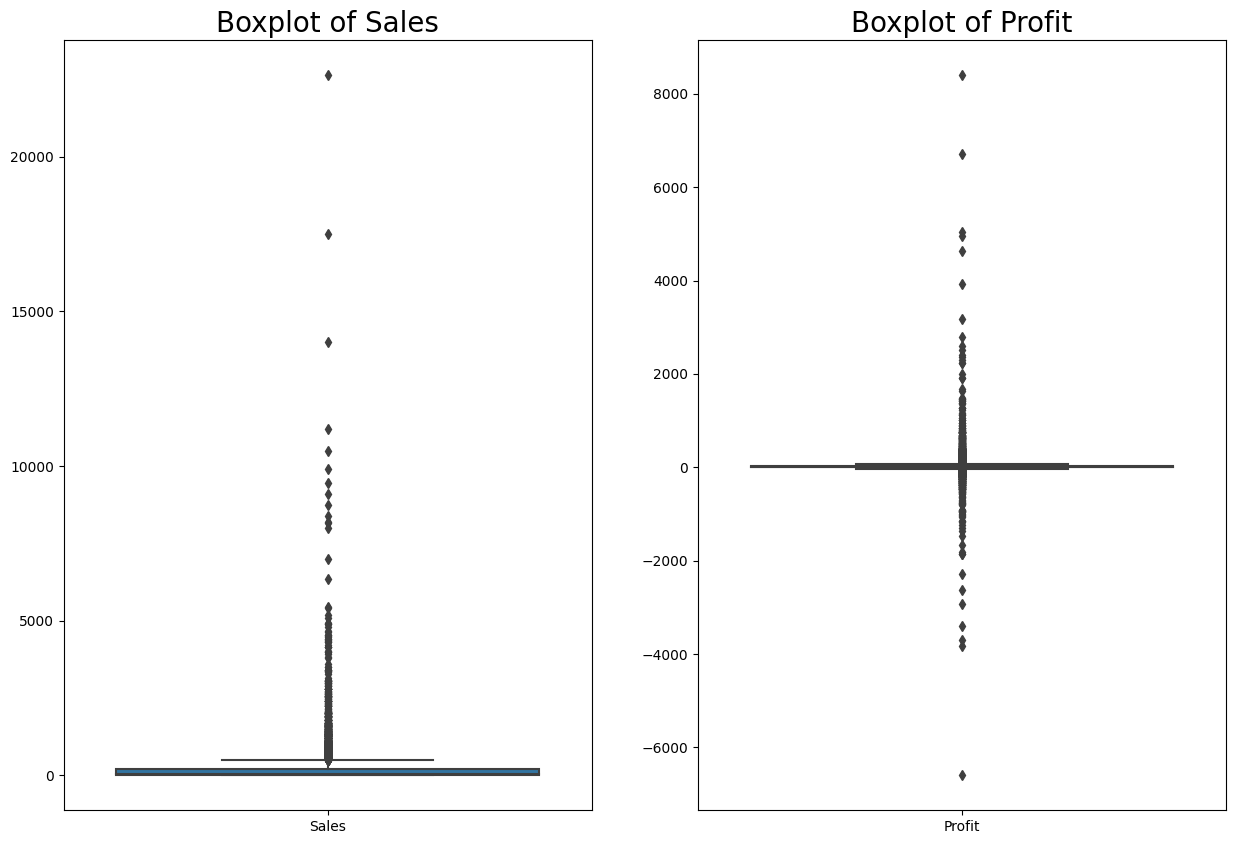

In [ ]:
# Menggunakan boxplot untuk mengecek data outliers dari variabel Sales dan Profit
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,10))
sns.boxplot(data=superstore[['Sales']],ax=ax1)
ax1.set_title("Boxplot of Sales", fontsize= 20)
sns.boxplot(data=superstore[['Profit']],ax=ax2)
ax2.set_title("Boxplot of Profit", fontsize= 20)
fig.show()

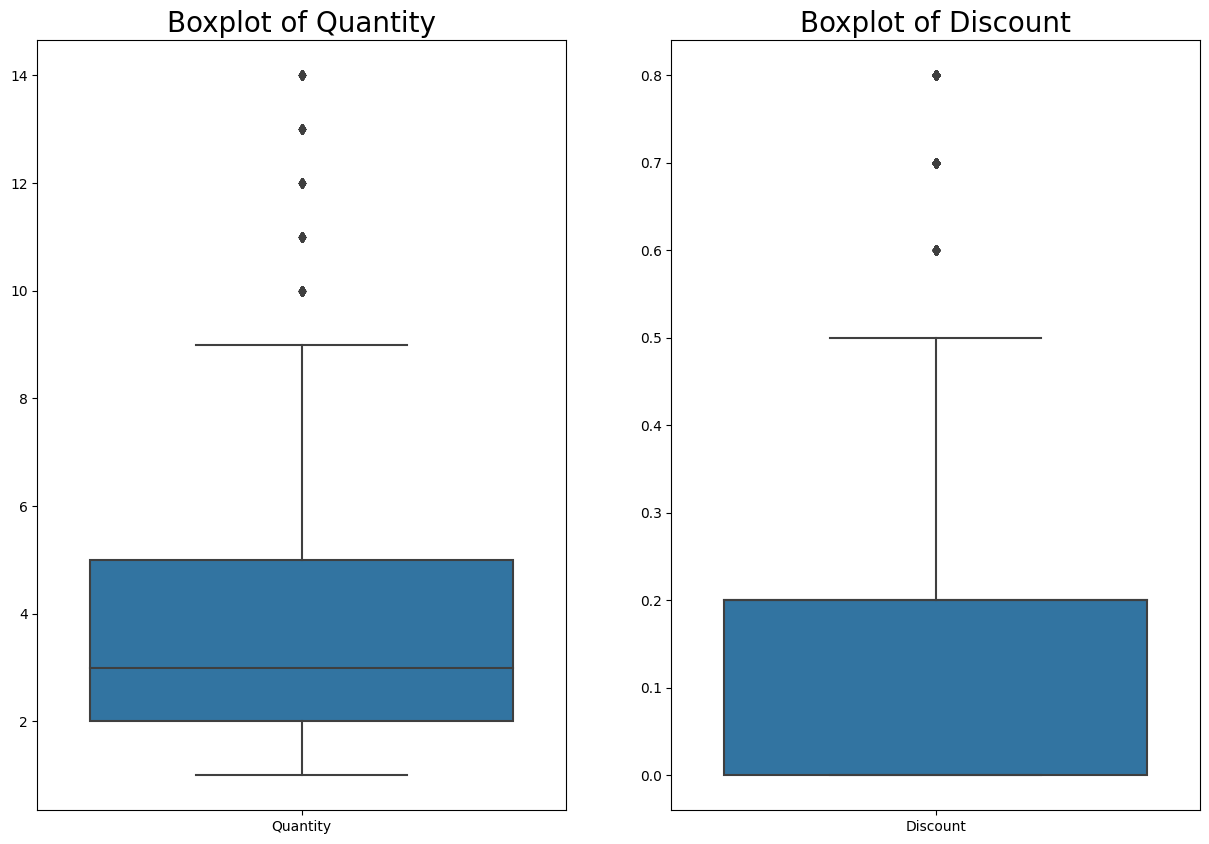

In [ ]:
# Menggunakan boxplot untuk mengecek data outliers dari variabel Quantity dan Discount
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,10))
sns.boxplot(data=superstore[['Quantity']],ax=ax1)
ax1.set_title("Boxplot of Quantity", fontsize= 20)
sns.boxplot(data=superstore[['Discount']],ax=ax2)
ax2.set_title("Boxplot of Discount", fontsize= 20)
fig.show()

Penentuan suatu nilai *outlier* dapat dilakukan dengan menganalisis nilai batas bawah dan batas atas dari suatu data. Kedua nilai tersebut bergantung pada nilai Rentang Interkuartil (IQR), dimana IQR didapat dengan mengurangi nilai kuartil ketiga (Q3) dengan kuartil pertama (Q1). Nilai batas atas didapat dengan rumus Q3 + 1,5xIQR, sementara batas bawah didapat dengan rumus Q1 - 1,5xIQR. Apabila nilai suatu sampel berada di bawah batas bawah dan di atas batas atas maka termasuk *outlier*.

In [ ]:
# Membuat fungsi untuk menghitung jumlah data outliers yang ada dari setiap variabel numerik
def find_outlier(data):
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)

    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    
    outlier = []
    for i in range(len(data)):
        if data[i] > batas_atas:
            outlier.append(data[i])
        if data[i] < batas_bawah:
            outlier.append(data[i])
    return len(outlier)

In [ ]:
# Menunjukkan jumlah outlier dari setiap variabel numerik 
var = ['Sales', 'Quantity', 'Discount', 'Profit']

for i in var :
    list_data = superstore[i].tolist()
    print('Jumlah outlier pada variabel {}:'.format(i),find_outlier(list_data),'\n')

Jumlah outlier pada variabel Sales: 1167 

Jumlah outlier pada variabel Quantity: 170 

Jumlah outlier pada variabel Discount: 856 

Jumlah outlier pada variabel Profit: 1881 



Dari hasil pemeriksaan di atas dapat diketahui bahwa terdapat nilai *outlier* pada variabel **Sales**, **Quantity**, **Discount** dan **Profit**. Dikarenakan nilai *outlier* banyak ditemukan pada dataset dan bukan mengindikasikan nilai yang memang salah atau semua nilai numerik pada kolom tersebut masuk akal dan dalam kisaran yang diharapkan dalam kaitannya dengan studi kasus superstore sehingga *outlier* tidak perlu dihapus.

#### Identifying Data Anomaly

In [ ]:
# Mengecek nilai anomali pada variabel Sales
superstore[superstore['Sales'] <= 0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [ ]:
# Mengecek nilai anomali pada variabel Quantity
superstore[superstore['Quantity'] <= 0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


Pengecekan nilai anomali pada variabel **Sales** dan **Quantity** dilakukan dengan mencari nilai yang kurang atau sama dengan nol. Apabila variabel **Sales** dan **Quantity** ada yang bernilai nol atau minus maka dipastikan ada kesalahan pada data. Hasil pengecekan pada variabel **Sales** dan **Quantity** ternyata tidak ditemukan nilai anomali.

### Fixing Dataset
Memperbaiki dataset dengan cara menghapus kolom yang tidak dibutuhkan dan mengubah tipe data dengan yang sesuai.

In [ ]:
# Menghapus kolom yang tidak diperlukan karena mengandung informasi yang tidak dibutuhkan
df_superstore = superstore.drop(columns=['Row ID','Country'], axis=1)

# Menampilkan kolom terbaru setelah diubah
df_superstore.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Dari dataset di atas ada dua kolom yang dihapus yaitu **Row ID** dan **Country**. Kolom **Row ID** dihapus karena hanya berisi nomor baris yang tidak diperlukan. Sedangkan kolom **Country** dihapus karena semua catatan transaksi menunjukkan negara yang sama yaitu *United States* sehingga kolom ini dirasa tidak diperlukan.

In [ ]:
# Mengganti tipe data dari variabel Order Date dan Ship Date
df_superstore['Order Date'] = pd.to_datetime(df_superstore['Order Date'])
df_superstore['Ship Date'] = pd.to_datetime(df_superstore['Ship Date'])

# Menampilkan informasi terbaru dari tipe data di dalam dataset
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   City           9994 non-null   object        
 8   State          9994 non-null   object        
 9   Postal Code    9994 non-null   int64         
 10  Region         9994 non-null   object        
 11  Product ID     9994 non-null   object        
 12  Category       9994 non-null   object        
 13  Sub-Category   9994 non-null   object        
 14  Product Name   9994 non-null   object        
 15  Sales          9994 n

Pada dataset superstore, variabel **Order Date** dan **Ship Date** kita ubah tipe datanya menjadi tipe datetime supaya mudah digunakan dalam analisis data berikutnya.

## Exploratory Data Analysis

### Data Distribution
Memvisualisasikan dan mengamati distribusi data pada variabel numerik dengan menggunakan histogram.

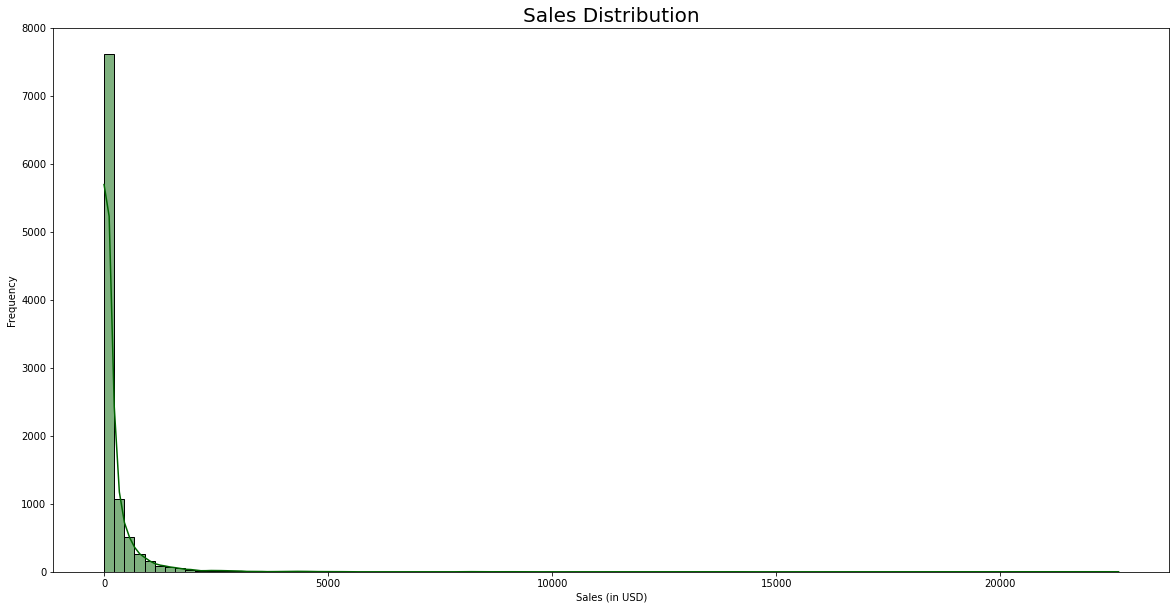

In [ ]:
# Memvisualisasikan distribusi variabel dengan membuat histogram untuk Sales
plt.figure(figsize = (20,10))
sns.histplot(data=df_superstore, x='Sales', bins=100, color='darkgreen', kde=True).set_title('Sales Distribution', fontsize=20)
plt.xlabel('Sales (in USD)')
plt.ylabel('Frequency')
plt.show()

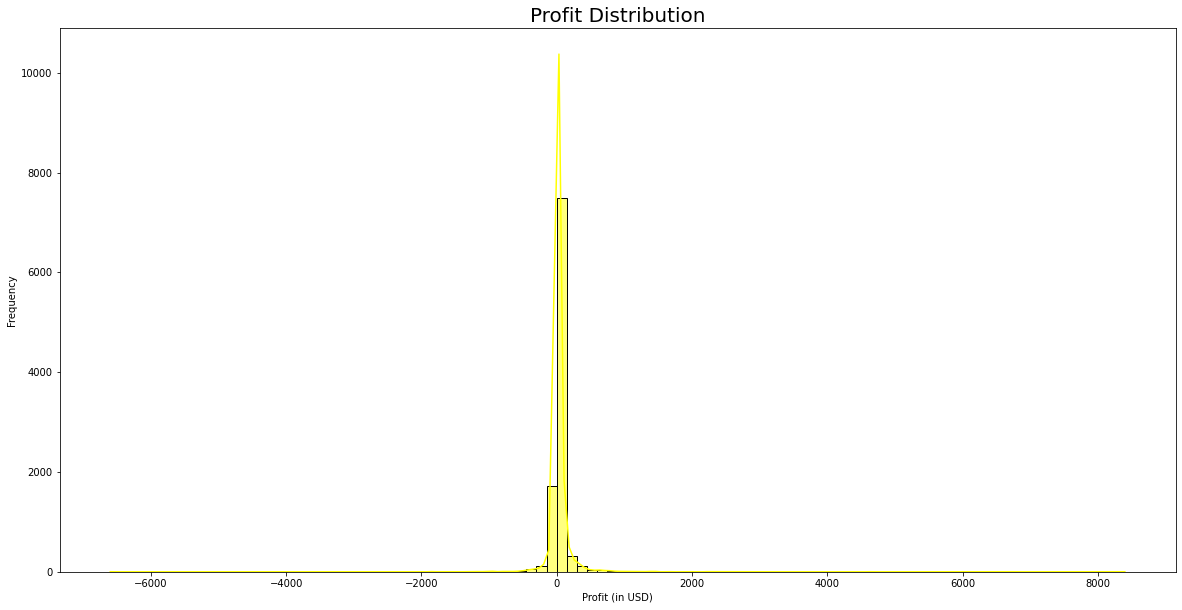

In [ ]:
# Memvisualisasikan distribusi variabel dengan membuat histogram untuk Profit
plt.figure(figsize = (20,10))
sns.histplot(data=df_superstore, x='Profit', bins=100, color='yellow', kde=True).set_title('Profit Distribution', fontsize=20)
plt.xlabel('Profit (in USD)')
plt.ylabel('Frequency')
plt.show()

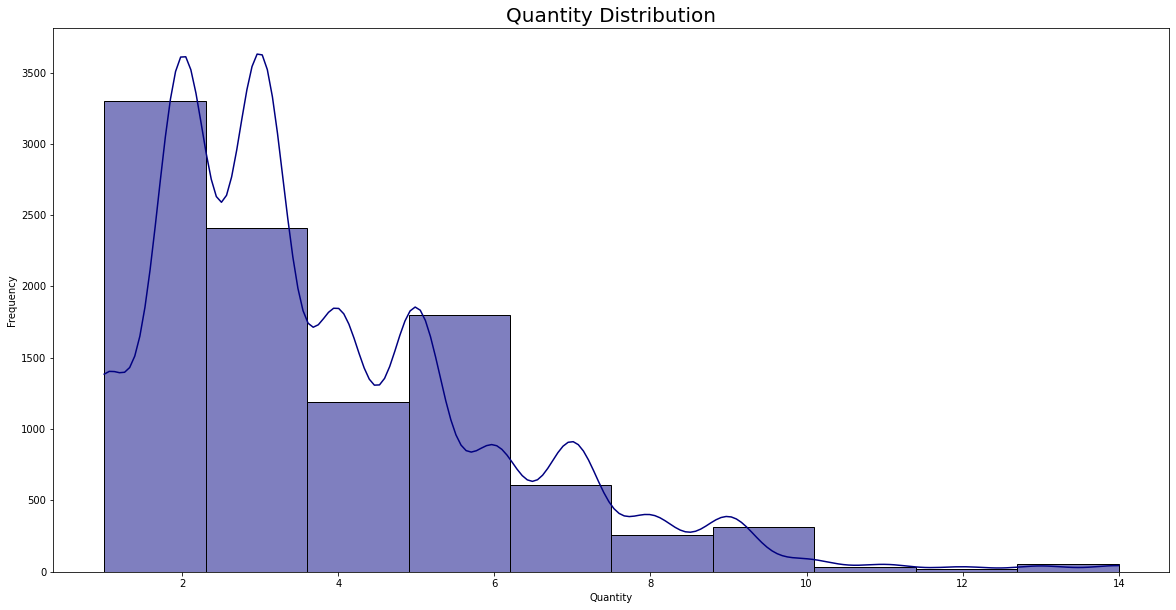

In [ ]:
# Memvisualisasikan distribusi variabel dengan membuat histogram untuk Quantity
plt.figure(figsize = (20,10))
sns.histplot(data=df_superstore, x='Quantity', bins=10, color='navy', kde=True).set_title('Quantity Distribution', fontsize=20)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

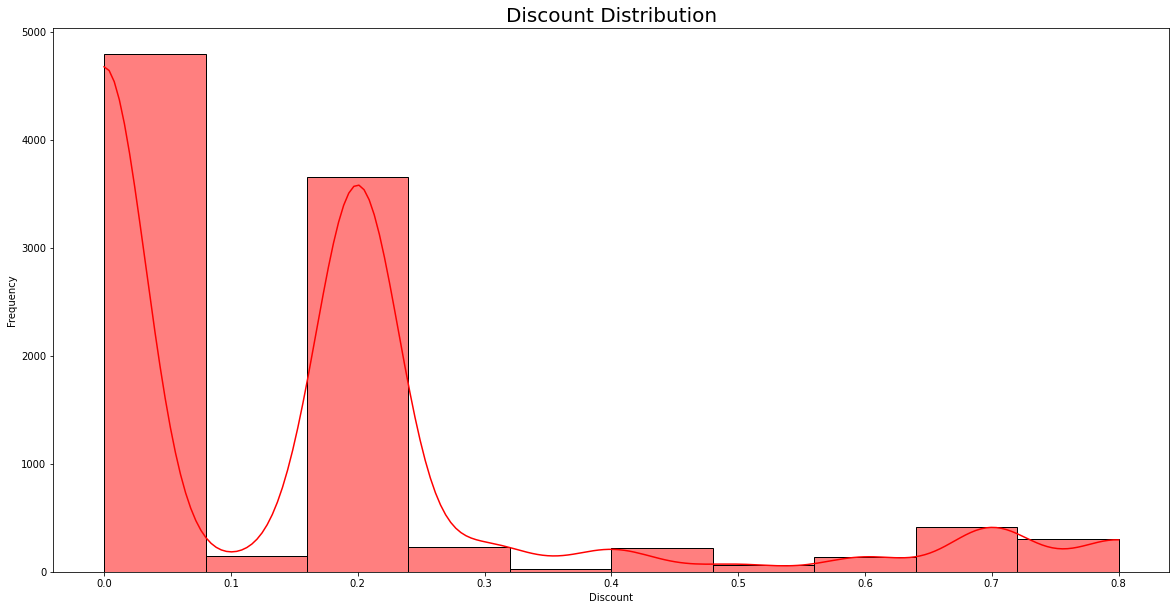

In [ ]:
# Memvisualisasikan distribusi variabel dengan membuat histogram untuk jumlah pengguna total
plt.figure(figsize = (20,10))
sns.histplot(data=df_superstore, x='Discount', bins=10, color='red', kde=True).set_title('Discount Distribution', fontsize=20)
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Menggunakan uji Shapiro Wilk untuk menentukan distribusi data apakah terdistribusi normal atau tidak
for i in ['Sales','Profit','Quantity','Discount']:
  sw_statistic, sw_pvalue = shapiro(df_superstore[i])
  print('Hasil uji variabel {}:'.format(i))
  if sw_pvalue > 0.05 :
    print(f'P-Value : {sw_pvalue}. Kita berasumsi data terdistribusi normal.\n')
  else :
    print(f'P-Value : {sw_pvalue}. Kita berasumsi data tidak terdistribusi normal.\n')

Hasil uji variabel Sales:
P-Value : 0.0. Kita berasumsi data tidak terdistribusi normal.

Hasil uji variabel Profit:
P-Value : 0.0. Kita berasumsi data tidak terdistribusi normal.

Hasil uji variabel Quantity:
P-Value : 0.0. Kita berasumsi data tidak terdistribusi normal.

Hasil uji variabel Discount:
P-Value : 0.0. Kita berasumsi data tidak terdistribusi normal.



Berdasarkan analisis histogram, bentuk grafik data **Sales**, **Profit**, **Quantity** dan **Discount** tidak menunjukkan *bell shape* dan memiliki beberapa puncak, dapat dikatakan data untuk keempat variabel tersebut **tidak terdistribusi normal**. Hal ini diperkuat dengan hasil uji statistik berupa uji Shapiro Wilk dimana keempat variabel tersebut memmiliki nilai p-value yang lebih kecil dari 0.05.

### Data Cardinalities
Mengecek apakah ada kardinalitas yang tinggi dari variabel kategorik di dalam dataset yang tersedia. Kardinalitas merupakan jumlah dari kategori unik di dalam suatu variabel kategorik.

In [ ]:
# Mengecek jumlah kategori yang unik dari setiap variabel kategorik
cat_var = ['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category','Sub-Category', 'Product Name']
for i in cat_var :
    print('Variabel {} memiliki data unik sebanyak {}'.format(i, df_superstore[i].nunique()),'\n')

Variabel Order ID memiliki data unik sebanyak 5009 

Variabel Ship Mode memiliki data unik sebanyak 4 

Variabel Customer ID memiliki data unik sebanyak 793 

Variabel Customer Name memiliki data unik sebanyak 793 

Variabel Segment memiliki data unik sebanyak 3 

Variabel City memiliki data unik sebanyak 531 

Variabel State memiliki data unik sebanyak 49 

Variabel Postal Code memiliki data unik sebanyak 631 

Variabel Region memiliki data unik sebanyak 4 

Variabel Product ID memiliki data unik sebanyak 1862 

Variabel Category memiliki data unik sebanyak 3 

Variabel Sub-Category memiliki data unik sebanyak 17 

Variabel Product Name memiliki data unik sebanyak 1850 



Berdasarkan hasil di atas variabel **Order ID**, **Customer ID**, **Customer Name**, **City**, **State**, **Postal Code**, **Product ID**, dan **Product Name** memiliki kardinalitas yang tinggi karena memiliki nilai unik yang banyak. Sementara variabel **Ship Mode**, **Segment**, **Region**, **Category** dan **Sub-Category** tidak memiliki kardinalitas yang tinggi karena memiliki nilai unik sedikit.

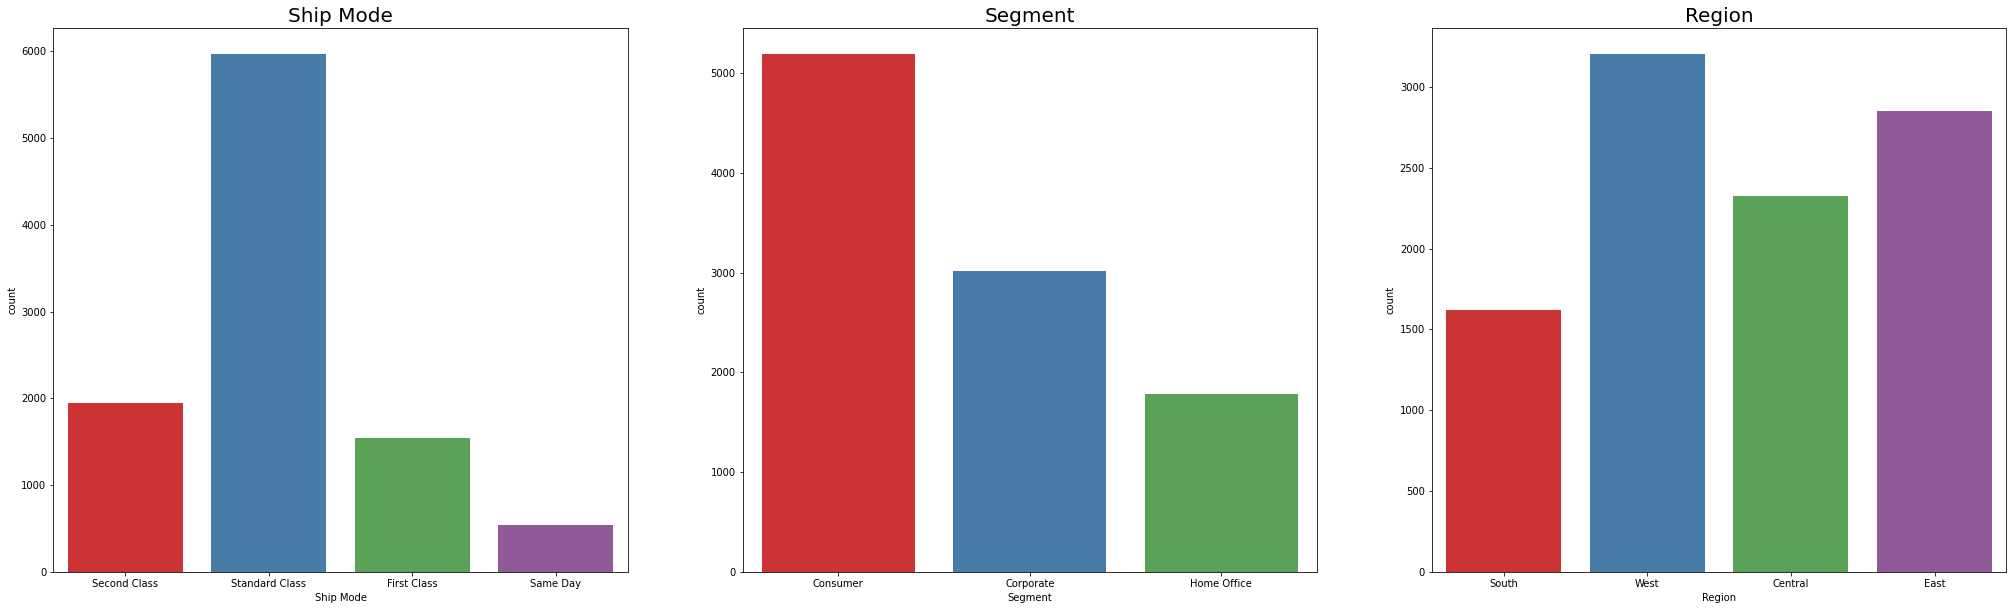

In [ ]:
# Memvisualisasi frekuensi dari data unik di setiap variabel kategorik dengan kardinalitas rendah
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(35,10))
sns.countplot(data=df_superstore, x='Ship Mode', ax=ax[0], palette='Set1').set_title('Ship Mode', fontsize= 20)
sns.countplot(data=df_superstore, x='Segment', ax=ax[1], palette='Set1').set_title('Segment', fontsize= 20)
sns.countplot(data=df_superstore, x='Region', ax=ax[2], palette='Set1').set_title('Region', fontsize= 20)
fig.show()

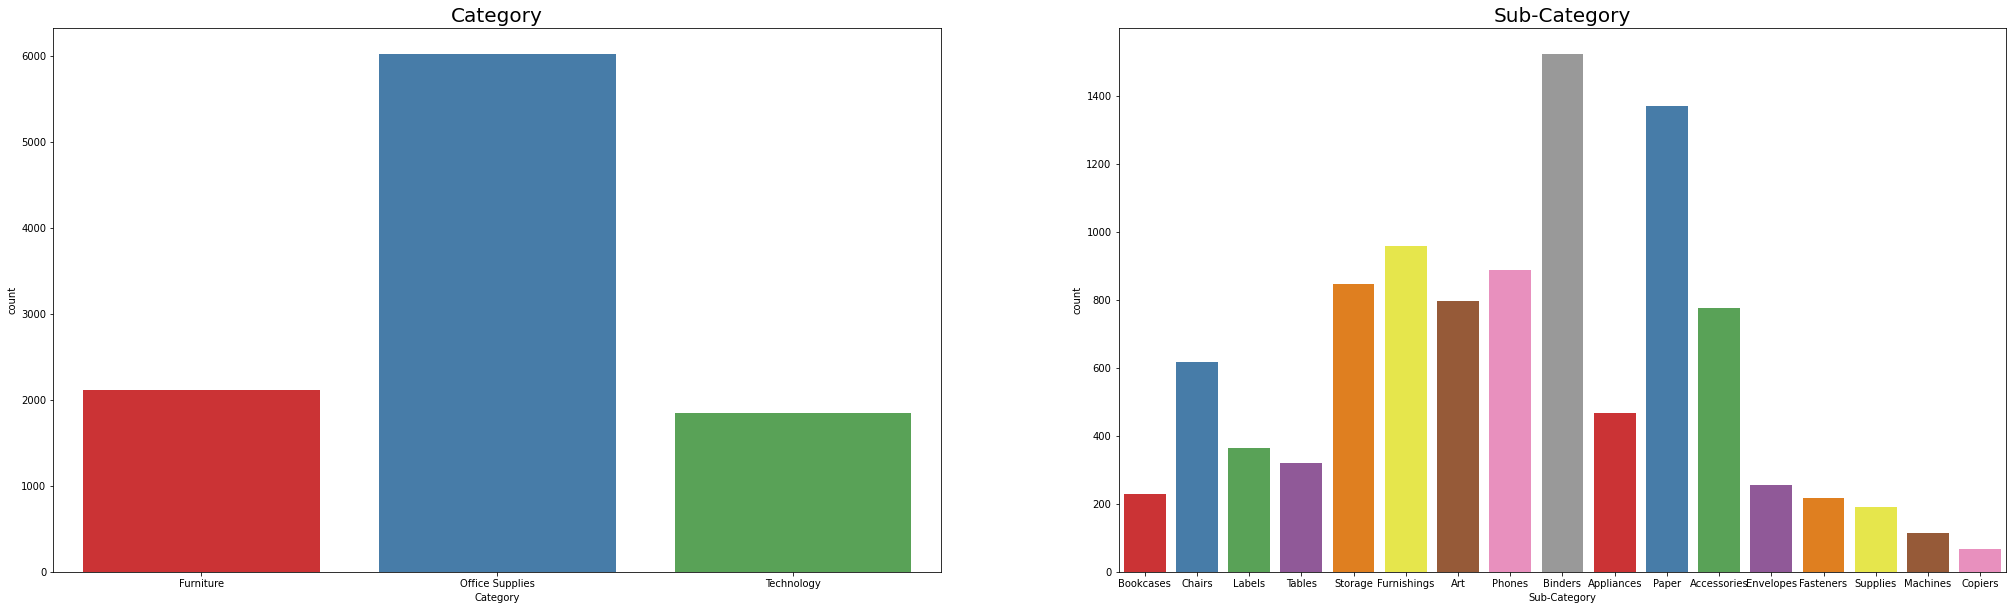

In [ ]:
# Memvisualisasi frekuensi dari data unik di setiap variabel kategorik dengan kardinalitas rendah
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35,10))
sns.countplot(data=df_superstore, x='Category', ax=ax[0], palette='Set1').set_title('Category', fontsize= 20)
sns.countplot(data=df_superstore, x='Sub-Category', ax=ax[1], palette='Set1').set_title('Sub-Category', fontsize= 20)
fig.show()

### Data Correlation
Memvisualisasikan dan mengamati korelasi antara variabel numerik dalam dataset menggunakan *heatmap*.

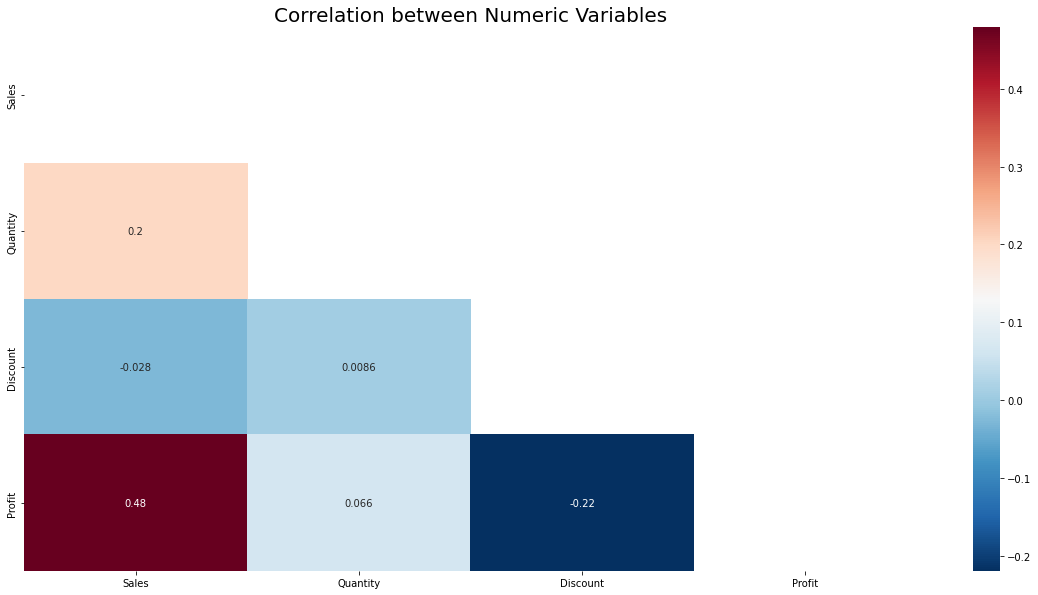

In [ ]:
# Memvisualisasi korelasi antara semua variabel numerik menggunakan heatmap
num_var = ['Sales','Quantity','Discount','Profit']
plt.figure(figsize=(20,10))
mask = np.zeros_like(df_superstore[num_var].corr(method='spearman'), dtype=np.bool) #Penggunaan metode spearman karena data pada variabel tersebut tidak terdistribusi normal
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_superstore[num_var].corr(),cmap='RdBu_r',mask=mask, annot=True)
plt.title('Correlation between Numeric Variables', fontdict = {'fontsize' : 20})
plt.show()

Nilai yang kita dapatkan dari heatmap ini menunjukkan nilai korelasi antara variabel. Nilai ini dapat berupa korelasi positif dan juga negatif. Semakin mendekati 1 maka korelasi positif semakin kuat dan semakin mendekati -1 maka korelasi negatif semakin kuat.

Dari *heatmap* di atas kita dapat menyimpulkan bahwa ada beberapa korelasi antara variabel yang ada, seperti:
- Variabel Sales dan Profit memiliki korelasi positif sedang dengan nilai 0.48. Hal ini menunjukkan ketika Sales mengalami peningkatan, Profit juga akan meningkat.
- Variabel Sales dan Discount memiliki korelasi negatif yang sangat lemah dengan nilai -0.028 atau dapat dikatakan hampir tidak berkorelasi.
- Variabel Sales dan Quantity memiliki korelasi positif yang lemah dengan nilai 0.2.
- Variabel Profit dan Discount memiliki korelasi negatif yang lemah dengan nilai -0.22.
- Variabel Profit dan Quantity memiliki korelasi positif yang sangat lemah dengan nilai 0.066 atau dapat dikatakan hampir tidak berkorelasi.
- Variabel Quantity dan Discount memiliki korelasi positif yang sangat lemah dengan nilai 0.0086 atau dapat dikatakan hampir tidak berkorelasi.

Dari analisis di atas dapat disimpulkan bahwa keempat variabel tersebut tidak memiliki korelasi kuat atau bernilai tinggi sehingga dapat digunakan untuk membuat model regresi linear karena tidak menimbulkan masalah multikolinearitas.

### Descriptive Analysis

#### Statistic Descriptive

In [ ]:
# Menunjukkan data statistik deskriptif dari variabel numerik
df_superstore[['Sales', 'Quantity', 'Discount', 'Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
# Menunjukkan data statistik deskriptif berupa jumlah total beberapa variabel numerik
df_superstore[['Sales', 'Quantity', 'Discount', 'Profit']].sum()

Sales       2.297201e+06
Quantity    3.787300e+04
Discount    1.561090e+03
Profit      2.863970e+05
dtype: float64

Dari analisis data numerik transaksi penjualan di *Superstore* dari tahun 2014-2017 di atas, kita dapat mengamati beberapa hal yaitu:
- Total penjualan selama empat tahun yaitu sebesar 2297201 USD dengan rata-rata penjualan sebesar 229.85 USD per transaksi. Nilai penjualan tertinggi sebesar 22638.48 USD dan nilai penjualan terendah sebesar 0.444 USD.
- Jumlah total produk yang terjual adalah 37873 dan rata-rata produk yang terjual sebesar 4 per transaksi. Jumlah produk tertinggi dalam penjualan yaitu 14 dan terendah sebesar 1.
- Diskon rata-rata adalah 15.6% untuk setiap transaksi. Nilai diskon berkisar dari 0% (tidak ada diskon) hingga 80%.
- Total keuntungan yang sudah dihasilkan superstore adalah 286397 USD dan rata-rata keuntungan sebesar 28.65 USD per transaksi. Nilai keuntungan tertinggi yang pernah diperoleh mencapai 8399.976 USD. Namun superstore juga pernah mengalami kerugian sebesar -6599.978 USD pada suatu transaksi. Dari hal ini dapat diketahui bahwa superstore tidak hanya mendapatkan keuntungan saja namun juga pernah mengalami kerugian dalam menjual produknya.

In [ ]:
# Mengecek jumlah transaksi yang untung, rugi atau tidak untung datau rugi dari keseluruhan transaksi
# Mengecek jumlah transaksi yang untung
profit = df_superstore[df_superstore['Profit'] > 0]
profit_percentage = len(profit)/len(df_superstore)*100
print('Transaksi untung : {} transaksi atau {:.2f}%'.format(len(profit), profit_percentage))

# Mengecek jumlah transaksi yang rugi
loss = df_superstore[df_superstore['Profit'] < 0]
loss_percentage = len(loss)/len(df_superstore)*100
print('Transaksi rugi   : {} transaksi atau {:.2f}%'.format(len(loss), loss_percentage))

# Mengecek jumlah transaksi yang tidak untung atau rugi
zero = df_superstore[df_superstore['Profit'] == 0]
zero_percentage = len(zero)/len(df_superstore)*100
print('Transaksi yang tidak untung atau rugi : {} transaksi atau {:.2f}%'.format(len(zero), zero_percentage))

Transaksi untung : 8058 transaksi atau 80.63%
Transaksi rugi   : 1871 transaksi atau 18.72%
Transaksi yang tidak untung atau rugi : 65 transaksi atau 0.65%


Setelah dicek secara lebih mendalam terhadap transaksi yang dilakukan, ternyata terdapat 8058 transaksi yang menguntungkan atau sebesar 80.63% dari keseluruhan transaksi. Untuk transaksi yang merugikan sebanyak 1871 transaksi atau 18.72% dari keseluruhan transaksi. Sementara itu, terdapat transaksi yang tidak untung maupun rugi sebanyak 65 transaksi atau 0.65% dari keseluruhan transaksi.

In [ ]:
# Menunjukkan data statistik deskriptif dari variabel kategorik
df_superstore.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,915,2001,3203,19,6026,1523,48


Dari analisis variabel kategorik dalam transaksi penjualan di *Superstore* dari tahun 2014-2017 di atas, kita dapat mengamati beberapa hal yaitu:
- Terdapat 4 jenis metode pengiriman dengan jenis *Standard Class* paling banyak dipilih sebesar 5968 atau 59.72% dari keseluruhan transaksi.
- Untuk segmen pelanggan terdapat 3 kategori, dimana kategori *Consumer* menjadi yang paling banyak yaitu sebesar 5191 atau 51.94% dari keseluruhan transaksi.
- Kota *New York City* (915 transaksi), negara bagian *California* (2001 transaksi) dan wilayah bagian barat (3203 transaksi) menjadi daerah tertinggi dalam transaksi penjualan.
- Terdapat 3 kategori dan 17 sub-kategori dari produk. Kategori *office suplies* (6026 transaksi) dan sub-kategori *binders* (1523 transaksi) menjadi yang paling banyak dibeli.

#### Time Series Analysis

##### Total Orders of Superstore Over Time

In [ ]:
# Extracting attributes for Order Date - Year, Month and Day of Week
df_superstore['order_date_year'] = df_superstore['Order Date'].apply(lambda x : x.year)
df_superstore['order_date_month'] = df_superstore['Order Date'].apply(lambda x : x.month)
df_superstore['order_date_year_month'] = df_superstore['Order Date'].apply(lambda x : x.strftime('%Y-%m'))
df_superstore['order_date_dayofweek'] = df_superstore['Order Date'].apply(lambda x : x.dayofweek)

In [ ]:
order_yr = df_superstore['order_date_year'].value_counts().reset_index().rename(columns={'index': 'Year', 'order_date_year': 'Total Orders'}).sort_values('Year')
order_yr

,Year,Total Orders
3,2014,1993
2,2015,2102
1,2016,2587
0,2017,3312


In [ ]:
print('Total Orders in First Year : ', order_yr.iloc[0, 1])
print('Total Orders in Last Year  : ', order_yr.iloc[3, 1])
print('\n')

order_increase = ((order_yr.iloc[3, 1] - order_yr.iloc[0, 1]) / order_yr.iloc[0, 1]) * 100

print('Orders Increase Percentage :', "{:.2f}".format(order_increase), '%')

Total Orders in First Year :  1993
Total Orders in Last Year  :  3312


Orders Increase Percentage : 66.18 %


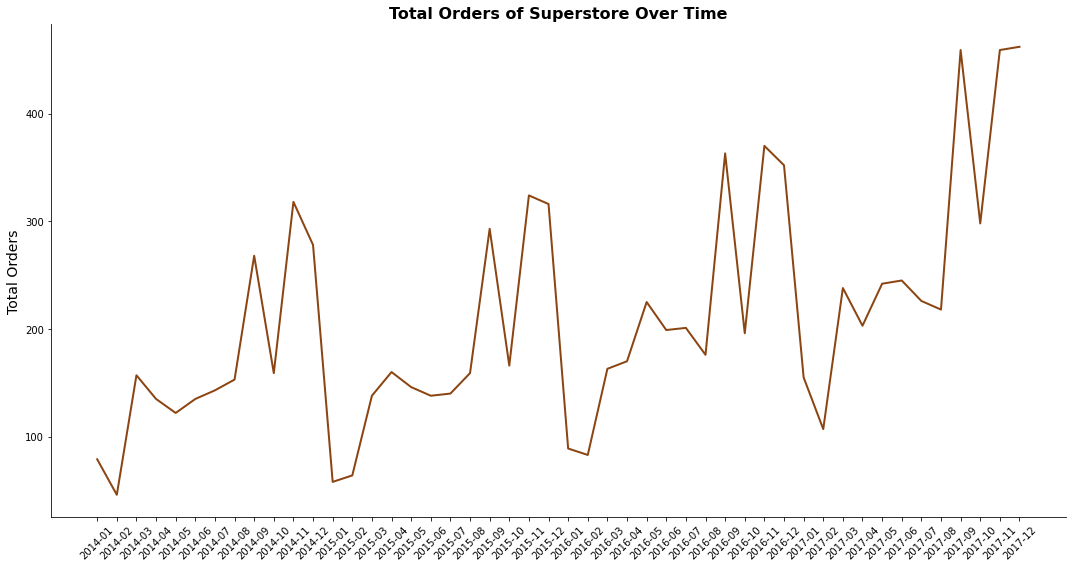

In [ ]:
# Grafik jumlah permintaan berdasarkan waktu
order_time = df_superstore['order_date_year_month'].value_counts().sort_index()

plt.figure(figsize=(15,8))
ax = sns.lineplot(data=order_time, x=order_time.index, y=order_time.values, color='saddlebrown', linewidth=2)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
sns.despine()
plt.title('Total Orders of Superstore Over Time', fontsize=16, fontweight='bold')
plt.ylabel('Total Orders', fontsize=14)
plt.tight_layout()
plt.show()

- Jumlah pesanan/transaksi di *Superstore* mengalami tren peningkatan dari tahun 2014 hingga 2017. Jumlah transaksi di tahun 2017 meningkat 66.18% dari jumlah transaksi di tahun 2014.
- Setiap tahun ada tiga bulan dimana transaksi paling banyak terjadi yaitu bulan September, November dan Desember. Oleh karena itu, ketika memasuki bulan-bulan tersebut perlu dilakukan penyediaan barang yang cukup untuk memenuhi permintaan dari pelanggan.

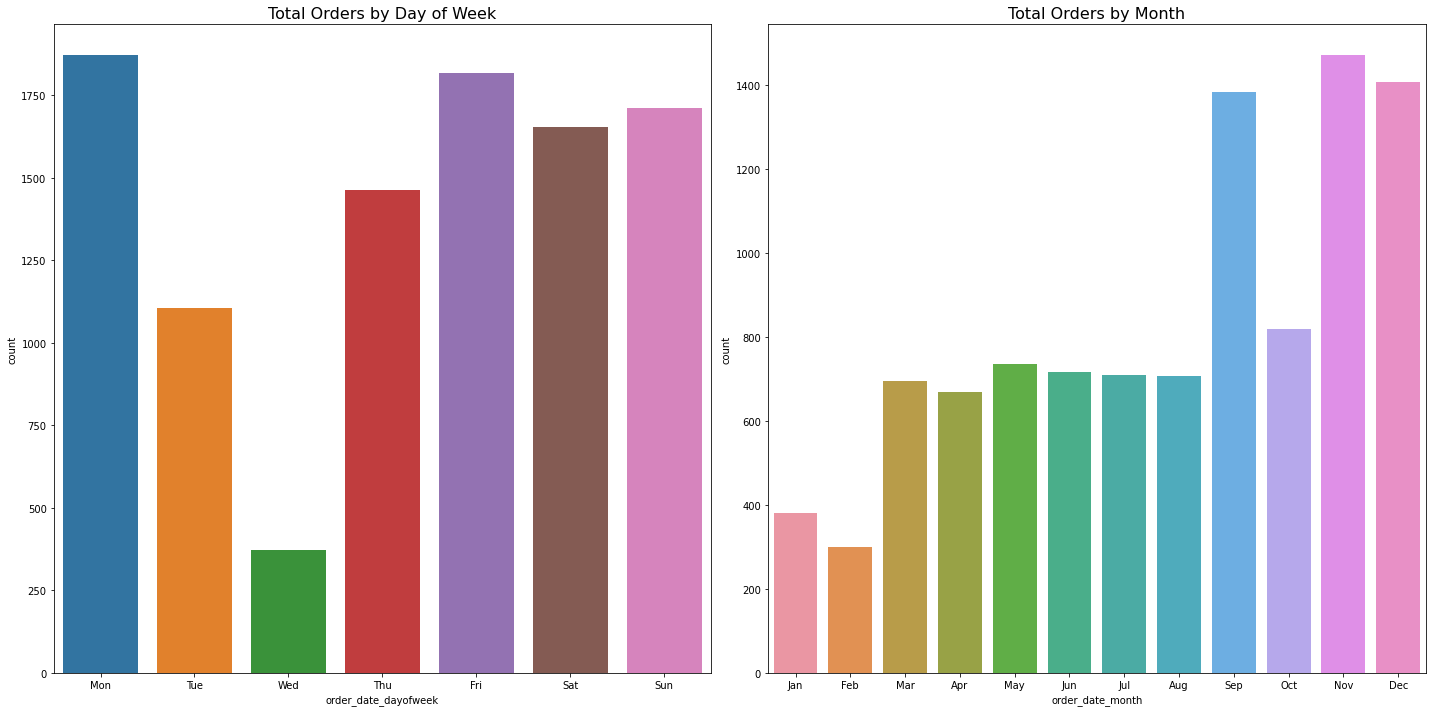

In [ ]:
# Grafik jumlah permintaan berdasarkan hari dan bulan
fig = plt.figure(figsize=(20,10))
gs = GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Grafik jumlah permintaan berdasarkan hari
sns.countplot(x='order_date_dayofweek', data=df_superstore, ax=ax1)
weekday= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax1.set_xticklabels(weekday)
ax1.set_title('Total Orders by Day of Week', size=16)

# Grafik jumlah permintaan berdasarkan bulan
sns.countplot(x='order_date_month', data=df_superstore, ax=ax2)
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax2.set_xticklabels(month)
ax2.set_title('Total Orders by Month', size=16)

plt.tight_layout()
plt.show()

- Hari Senin merupakan hari dimana paling banyak terjadi transaksi pembelian dibandingkan hari lainnya.
- Bulan September, November dan Desember merupakan bulan yang paling banyak terjadi transaksi pembelian, sementara bulan Januari dan Februari merupakan bulan yang paling sedikit terjadi transaksi pembelian.

##### Sales of Superstore Over Time

In [ ]:
sales_yr = df_superstore.groupby('order_date_year', as_index=False)['Sales'].sum()
sales_yr

,order_date_year,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


In [ ]:
print('Total Sales in First Year : ', sales_yr.iloc[0, 1])
print('Total Sales in Last Year  : ', sales_yr.iloc[3, 1])
print('\n')

sales_increase = ((sales_yr.iloc[3, 1] - sales_yr.iloc[0, 1]) / sales_yr.iloc[0, 1]) * 100

print('Sales Increase Percentage :', "{:.2f}".format(sales_increase), '%')

Total Sales in First Year :  484247.4981
Total Sales in Last Year  :  733215.2552


Sales Increase Percentage : 51.41 %


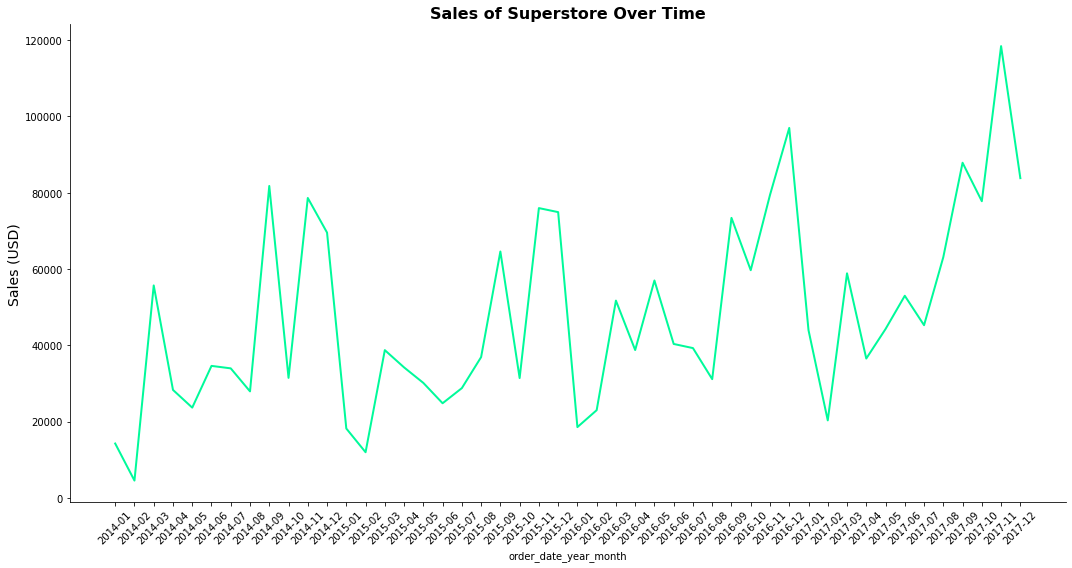

In [ ]:
# Grafik jumlah penjualan berdasarkan waktu
sales_month = df_superstore.groupby('order_date_year_month', as_index=False)['Sales'].sum()
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=sales_month, x='order_date_year_month', y='Sales', color='mediumspringgreen', linewidth=2)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
sns.despine()
plt.title('Sales of Superstore Over Time', fontsize=16, fontweight='bold')
plt.ylabel('Sales (USD)', fontsize=14)
plt.tight_layout()
plt.show()

- Berdasarkan grafik di atas, jumlah penjualan menunjukkan tren kenaikan dimana jumlah penjualan pada tahun 2017 mengalami peningkatan sebesar 51.41% dibandingkan dengan penjualan tahun 2014.
- Bulan September, November dan Desember setiap tahunnya menghasilkan jumlah penjualan terbesar. Hal ini sebanding dengan jumlah transaksi paling banyak terjadi juga pada bulan-bulan tersebut.


##### Profit of Superstore Over Time

In [ ]:
profit_yr = df_superstore.groupby('order_date_year', as_index=False)['Profit'].sum()
profit_yr

,order_date_year,Profit
0,2014,49543.9741
1,2015,61618.6037
2,2016,81795.1743
3,2017,93439.2696


In [ ]:
print('Total Profit in First Year : ', profit_yr.iloc[0, 1])
print('Total Profit in Last Year  : ', profit_yr.iloc[3, 1])
print('\n')

profit_increase = ((profit_yr.iloc[3, 1] - profit_yr.iloc[0, 1]) / profit_yr.iloc[0, 1]) * 100

print('Profit Increase Percentage :', "{:.2f}".format(profit_increase), '%')

Total Profit in First Year :  49543.9741
Total Profit in Last Year  :  93439.2696


Profit Increase Percentage : 88.60 %


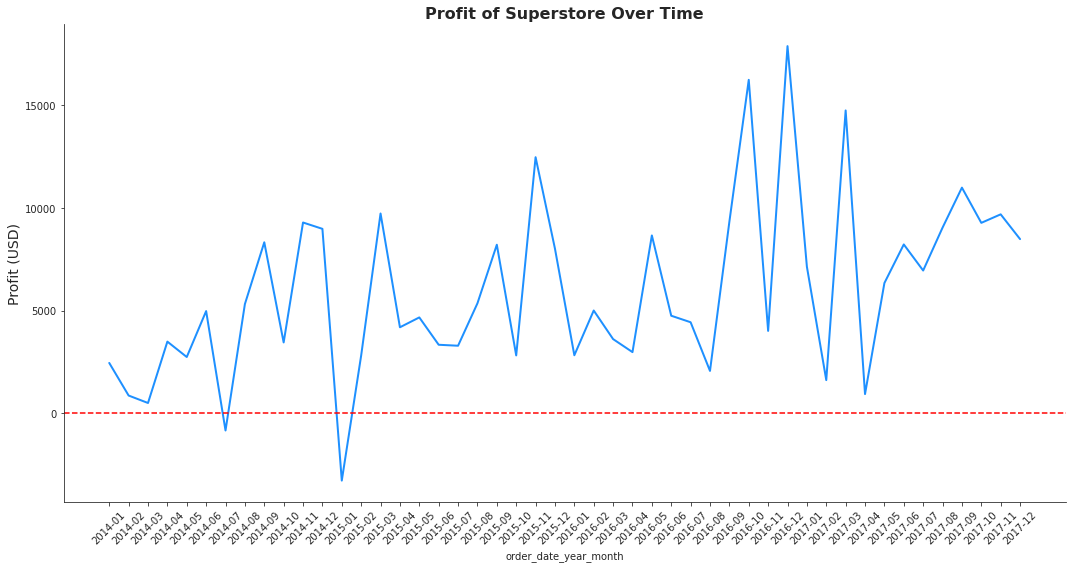

In [ ]:
# Grafik jumlah penjualan berdasarkan waktu
profit_month = df_superstore.groupby('order_date_year_month', as_index=False)['Profit'].sum()
plt.figure(figsize=(15,8))
sns.set_style('ticks')
ax = sns.lineplot(data=profit_month, x='order_date_year_month', y='Profit', color='dodgerblue', linewidth=2)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
sns.despine()
plt.axhline(y=0, color='red', linestyle='dashed')
plt.title('Profit of Superstore Over Time', fontsize=16, fontweight='bold')
plt.ylabel('Profit (USD)', fontsize=14)
plt.tight_layout()
plt.show()

- Pada tahun 2017, jumlah keuntungan mengalami peningkatan sebesar 88.60% dibandingkan tahun 2014.
- Dari tahun 2014 hingga 2017 hampir setiap bulannya selalu memperoleh keuntungan, hanya pada bulan Juli 2014 dan Januari 2015 yang mengalami kerugian.

#### Category and Sub-Category Analysis

##### Category Analysis

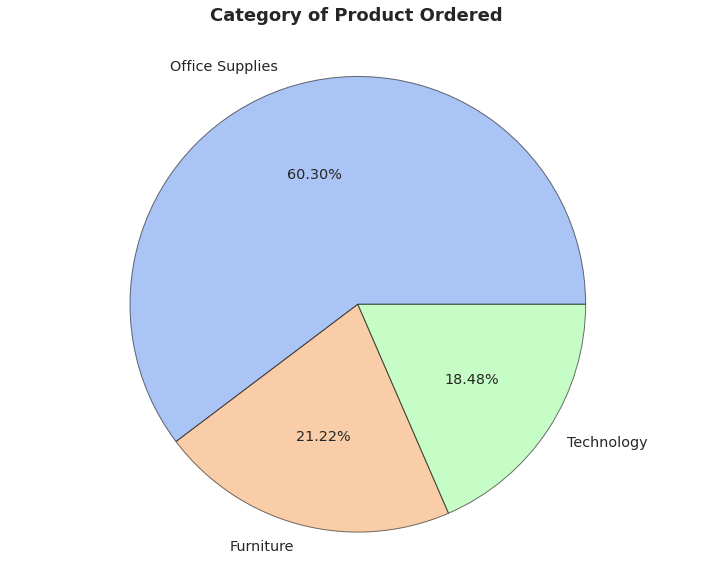

In [ ]:
# Pie chart perbandingan jumlah transaksi berdasarkan category
category = df_superstore['Category'].value_counts()

plt.figure(figsize=(10,8))
labels = category.index
colors = ['cornflowerblue', 'sandybrown', 'palegreen']
plt.pie(category.values,
        labels = labels,
        autopct='%.2f%%',
        colors=colors,
        wedgeprops={'linewidth': 1, 'edgecolor':'black', 'alpha':0.55},
        textprops={'size': 'x-large'})
plt.title('Category of Product Ordered', fontsize=18, fontweight='bold', pad=30)
plt.axis('equal')
plt.tight_layout()
plt.show()

Produk dengan kategori *Office Supplies* merupakan produk yang paling banyak dipesan dimana jumlah pesanannya mencapai 60.3% dari keseluruhan pesanan. Jumlah ini hampir 3 kali lipat dari jumlah pesanan produk dengan kategori *Furniture* ataupun *Technology*.

In [ ]:
df_category = df_superstore.groupby('Category')[['Sales', 'Profit']].sum()
df_category['Percentage of Sales'] = round((df_category['Sales'] / df_category['Sales'].sum())*100, 2)
df_category['Percentage of Profit'] = round((df_category['Profit'] / df_category['Profit'].sum())*100, 2)
df_category['Profit Margin'] = df_category['Profit'] / df_category['Sales']
df_category[['Sales', 'Percentage of Sales', 'Profit', 'Percentage of Profit', 'Profit Margin']]

,Sales,Percentage of Sales,Profit,Percentage of Profit,Profit Margin
Category,,,,,
Furniture,741999.7953,32.3,18451.2728,6.44,0.024867
Office Supplies,719047.0320,31.3,122490.8008,42.77,0.170352
Technology,836154.0330,36.4,145454.9481,50.79,0.173957


Dalam hal total penjualan, produk dengan kategori *Technology* menjadi yang tertinggi yaitu di atas 800000 USD dan sekitar 50% dari total profit berasal dari kategori ini.

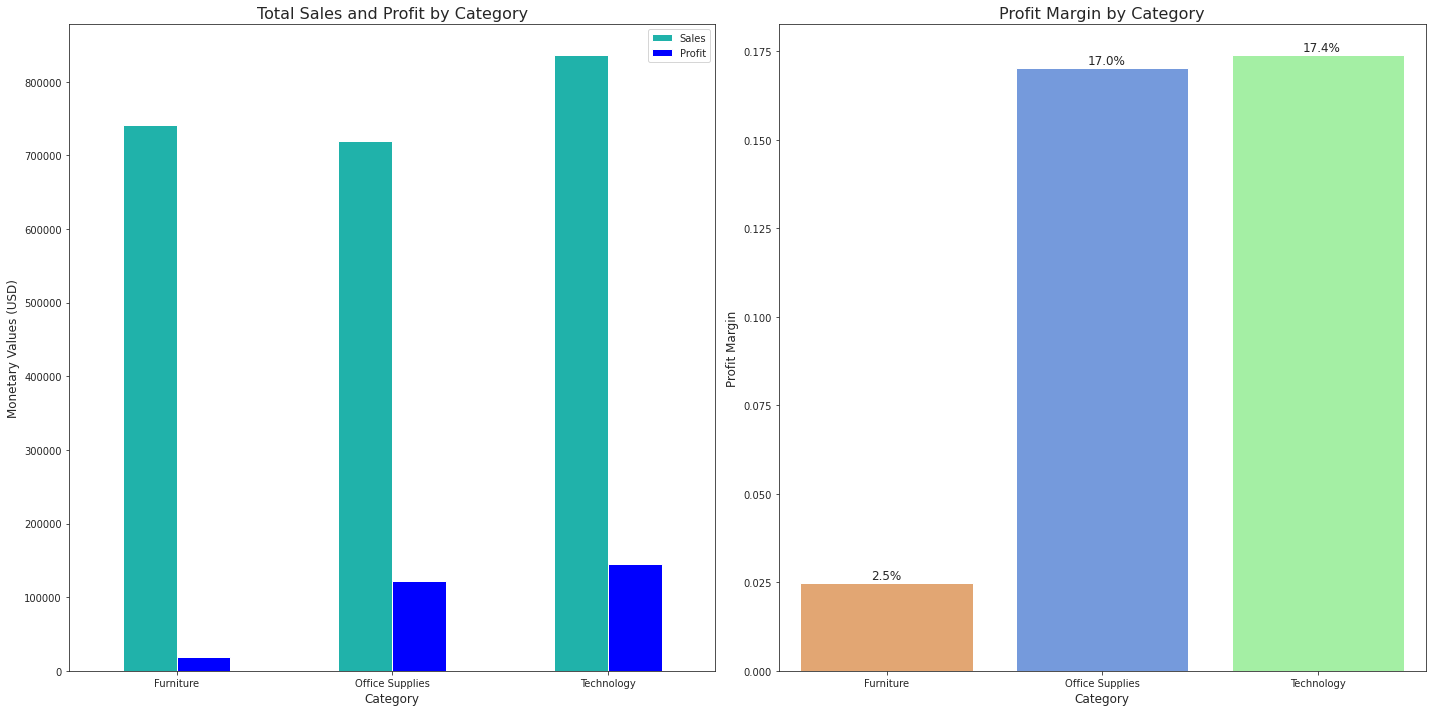

In [ ]:
# Menunjukkan total penjualan dan profit serta profit margin berdasarkan kategori
fig = plt.figure(figsize=(20,10))
gs = GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Total penjualan dan profit berdasarkan kategori
plot = df_category[['Sales','Profit']].plot(kind='bar', color=['lightseagreen','blue'], ax=ax1)
for tick in plot.get_xticklabels():
    tick.set_rotation(0)
ax1.set_title('Total Sales and Profit by Category', size=16)
ax1.set_xlabel('Category', size=12)
ax1.set_ylabel('Monetary Values (USD)', size=12)

# Barplot yang Menunjukkan profit margin berdasarkan kategori
sns.barplot(x=df_category.index, y=df_category['Profit Margin'], palette=['sandybrown', 'cornflowerblue', 'palegreen'], ax=ax2)
for p in ax2.patches:
    x, _ = p.get_xy()
    ax2.annotate(f"{p.get_height()*100 :.1f}%", xy=(x+0.33, p.get_height()+0.001), size=12)
ax2.set_title('Profit Margin by Category', size=16)
ax2.set_xlabel('Category', size=12)
ax2.set_ylabel('Profit Margin', size=12)

plt.tight_layout()
plt.show()

- Produk dengan kategori *Technology* merupakan produk yang memiliki total penjualan dan profit tertinggi dibandingkan dengan dua kategori produk lainnya. 
- Produk dengan kategori *Office Supplies* dan *Technology* memiliki *profit margin* terbesar sekitar 17% sementara produk dengan kategori *Furniture* memiliki *profit margin* terendah sebesar 2.5% saja. Hal ini menandakan bahwa produk dengan kategori *Office Supplies* dan *Technology* merupakan produk yang paling menguntungkan ketika dijual dibandingkan dengan produk *Furniture*.
- Produk *Furniture* memiliki total penjualan yang lebih besar dibandingkan produk *Office Supplies*, tetapi besar profit yang dihasilkan 6 kali lebih kecil dibandingkan produk *Office Supplies*. Profit dan profit margin yang dihasilkan kategori ini sangat rendah. 
- Produk dengan kategori *Technology* memiliki total pesanan yang paling sedikit (18.48%), tetapi mampu menghasilkan total penjualan dan *profit margin* tertinggi dibandingkan kategori lainnya. Oleh karena itu, produk dengan kategori *Technology* merupakan produk yang paling menguntungkan ketika dijual sehingga untuk kedepannya *Superstore* diharapkan dapat menjual lebih banyak lagi produk-produk dengan kategori *Technology*.
- Produk dengan kategori *Office Supplies* juga termasuk kategori yang menghasilkan profit margin yang tinggi setelah kategori *Technology*. Namun total penjualannya masih lebih rendah dibandingkan kedua kategori lainnya. Oleh karena itu, *Superstore* disarankan untuk meningkatkan penjualannya yang sangat rendah melalui strategi pemasaran yang tepat guna meningkatkan keuntungan.


##### Sub-Category Analysis

In [ ]:
subcat = df_superstore.groupby(['Category','Sub-Category'], as_index=False)['Order ID'].count()
subcat.rename({'Order ID': 'Total Orders'}, axis=1, inplace=True)

fig = px.treemap(subcat, path=['Category', 'Sub-Category'], values='Total Orders', title='Total Orders by Sub-Category')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

- *Binder* dan *Paper* merupakan sub-kategori produk yang paling banyak dipesan dalam kategori *Office Supplies*. 
- *Furnishings* merupakan sub-kategori produk yang paling banyak dipesan dalam kategori *Furniture*. 
- *Phones* merupakan sub-kategori produk yang paling banyak dipesan dalam kategori *Technology*.

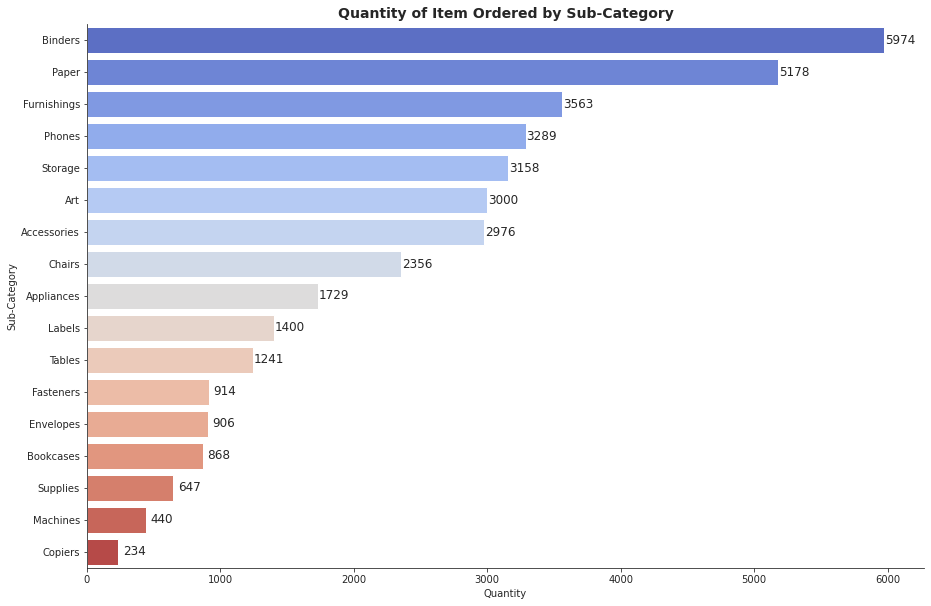

In [ ]:
# Menghitung kuantitas barang yang dijual berdasarkan sub-kategori
quantiy_subcat = df_superstore.groupby('Sub-Category', as_index=False)['Quantity'].sum().sort_values('Quantity', ascending=False)

# Barplot yang menunjukkan kuantitas barang yang dijual berdasarkan sub-kategori
plt.figure(figsize=(15,10))
plot = sns.barplot(data=quantiy_subcat, x='Quantity', y='Sub-Category', palette='coolwarm')
for bar in plot.patches:
  plot.annotate(format(bar.get_width(), '.0f'),
                (120+bar.get_width(), bar.get_y()+0.5*bar.get_height()),
                ha='center', va='center', size=12)
plt.title('Quantity of Item Ordered by Sub-Category', fontsize=14, fontweight='bold')
sns.despine()
plt.show()

- *Binders* merupakan sub-kategori produk yang paling banyak dibeli sementara *Copiers* merupakan sub-kategori produk yang paling sedikit dibeli.

- Hasil observasi berdasarkan kategori:
1. Office Supplies
  -  Sub-kategori *Binders* dan *Paper* menjadi produk yang kuantitas penjualannya tertinggi yaitu diatas 5000.
  - Sub-kategori *Supplies* menjadi produk yang kuantitas penjualannya terendah (647).
2. Furniture
  - Sub-kategori *Furnishings* menjadi produk yang kuantitas penjualannya tertinggi (3563).
  - Sub-kategori *Bookcases* menjadi produk yang kuantitas penjualannya terendah (868).
3. Technology
  - Sub-kategori *Phones* menjadi produk yang kuantitas penjualannya tertinggi (3289).
  - Sub-kategori *Copiers* menjadi produk yang kuantitas penjualannya terendah (234).

In [ ]:
df_subcategory = df_superstore.groupby('Sub-Category')[['Sales', 'Profit']].sum()
df_subcategory['Percentage of Sales'] = round((df_subcategory['Sales'] / df_subcategory['Sales'].sum())*100, 2)
df_subcategory['Percentage of Profit'] = round((df_subcategory['Profit'] / df_subcategory['Profit'].sum())*100, 2)
df_subcategory['Profit Margin'] = df_subcategory['Profit'] / df_subcategory['Sales']
df_subcategory[['Sales', 'Percentage of Sales', 'Profit', 'Percentage of Profit', 'Profit Margin']]

,Sales,Percentage of Sales,Profit,Percentage of Profit,Profit Margin
Sub-Category,,,,,
Accessories,167380.3180,7.29,41936.6357,14.64,0.250547
Appliances,107532.1610,4.68,18138.0054,6.33,0.168675
Art,27118.7920,1.18,6527.7870,2.28,0.240711
Binders,203412.7330,8.85,30221.7633,10.55,0.148574
Bookcases,114879.9963,5.00,-3472.5560,-1.21,-0.030228
Chairs,328449.1030,14.30,26590.1663,9.28,0.080957
Copiers,149528.0300,6.51,55617.8249,19.42,0.371956
Envelopes,16476.4020,0.72,6964.1767,2.43,0.422676
Fasteners,3024.2800,0.13,949.5182,0.33,0.313965


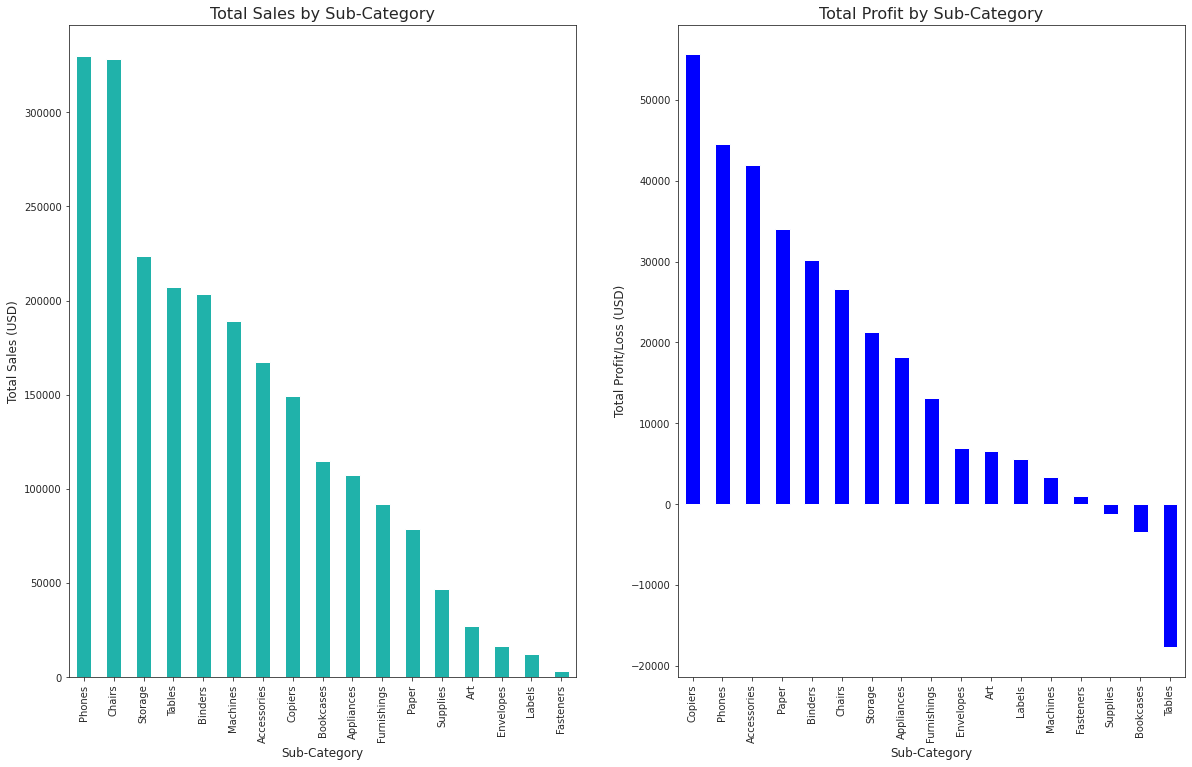

In [ ]:
# Menunjukkan total transaksi dan total penjualan berdasarkan sub-kategori
fig = plt.figure(figsize=(20,12))
gs = GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Barplot total penjualan berdasarkan sub-kategori
df_subcategory['Sales'].sort_values(ascending=False).plot(kind='bar', color='lightseagreen', ax=ax1)
ax1.set_title('Total Sales by Sub-Category', size=16)
ax1.set_xlabel('Sub-Category', size=12)
ax1.set_ylabel('Total Sales (USD)', size=12)

# Barplot total profit berdasarkan sub-kategori
df_subcategory['Profit'].sort_values(ascending=False).plot(kind='bar', color='blue', ax=ax2)
ax2.set_title('Total Profit by Sub-Category', size=16)
ax2.set_xlabel('Sub-Category', size=12)
ax2.set_ylabel('Total Profit/Loss (USD)', size=12)

plt.show()

- *Phones* dan *Chairs* merupakan sub-kategori produk yang memiliki total penjualan tertinggi yaitu di atas 300000 USD. Sementara *Fasteners* menjadi sub-kategori produk dengan total penjualan terendah.
- Sub-kategori *Copiers* memiliki profit tertinggi (di atas 50000 USD), diikuti *Phones*, *Accessories*, *Paper*, *Binders* dan *Chairs*. Oleh karena itu, diperlukan strategi pemasaran yang berfokus pada kelima sub-kategori tersebut agar dapat meningkatkan profit dari *Superstore*.
- Dari grafik *total profit* dapat dilihat bahwa 3 besar sub-kategori yang memiliki profit tertinggi merupakan produk dengan kategori *Technology* dimana profit yang dihasilkan setiap sub-kategori di atas 40000 USD.
- *Supplies*, *Bookcases* dan *Tables* merupakan sub-kategori produk yang memberikan kerugian (ditandai dengan nilai profit yang negatif), di mana *Tables* memberikan kerugian terbesar.

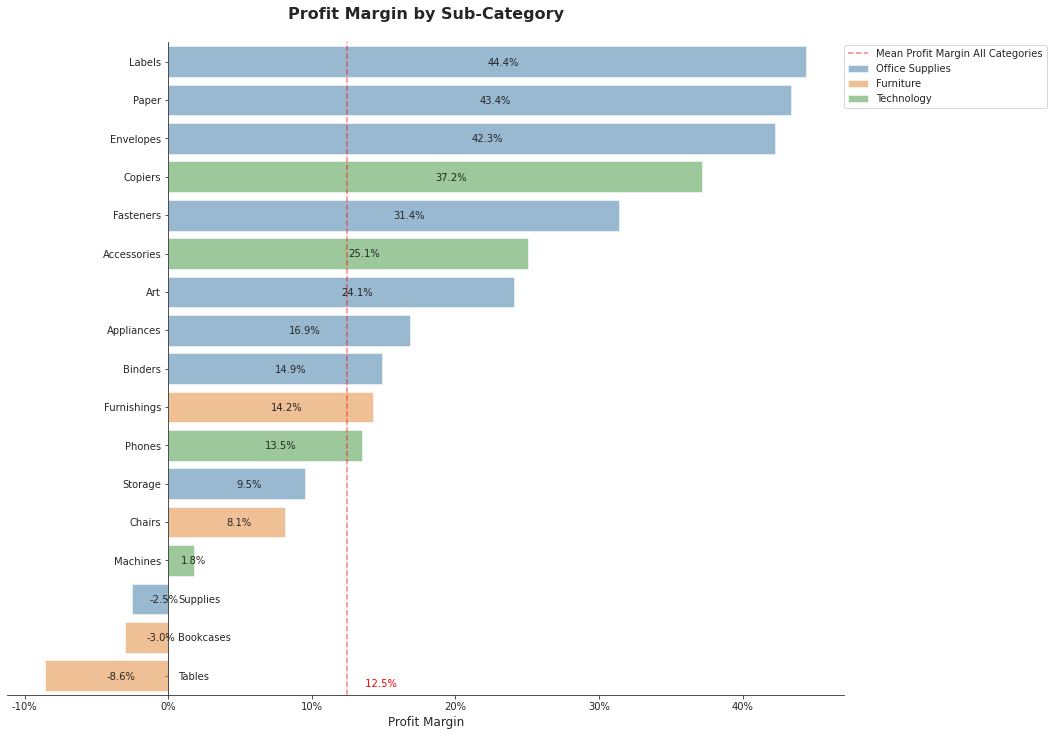

In [ ]:
# Barplot profit margin berdasarkan sub-kategori
profit_margin = df_superstore.groupby(['Category', 'Sub-Category'], as_index=False)[['Sales', 'Profit']].sum()
profit_margin['Profit Margin'] = profit_margin['Profit'] / profit_margin['Sales']
profit_margin.sort_values('Profit Margin', ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(15,12))
sns.barplot(data=profit_margin, x='Profit Margin', y='Sub-Category', hue='Category', hue_order=['Office Supplies', 'Furniture', 'Technology'], alpha=0.5, dodge=False, ax=ax)
ax.set_xlabel('Profit Margin', size=12)
ax.set_ylabel('')
ax.set_title('Profit Margin by Sub-Category\n', size=16, fontweight='bold')
ax.spines['left'].set_position('zero')

index = [-1, -2, -3]
for tick in index:
  ax.get_yticklabels()[tick].set_x(0.012)
  ax.get_yticklabels()[tick].set_horizontalalignment("left")

for bar in ax.patches:
  _, y = bar.get_xy()
  ax.annotate(f'{bar.get_width()*100 :.1f}%', (bar.get_width() / 2, y+0.5))

mean_profit = profit_margin['Profit'].sum() / profit_margin['Sales'].sum()
ax.axvline(mean_profit, color='red', alpha=0.5, ls='--', label='Mean Profit Margin All Categories')
ax.text(x=mean_profit+0.01, y=len(profit_margin)-0.7, s=f'{mean_profit*100 : .1f}%', color='red')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(loc=(1, 0.9))

sns.despine()

- Sebagian besar sub-kategori produk dari kategori *Offices Supplies* menghasilkan nilai profit margin yang positif, hanya sub-kategori *Supplies* yang memiliki nilai profit margin negatif (mengalami kerugian). Selain itu, profit margin sub-kategori *Labels*, *Paper* dan *Envelopes* memiliki nilai tertinggi di antara sub-kategori lainnya dengan profit marginnya di atas 40%.
- Semua sub-kategori produk dari kategori *Technology* memiliki nilai profit margin yang positif (semua sub-kategori menghasilkan keuntungan). *Copiers*, *Accessories* dan *Phones* memiliki profit margin di atas 12.5% (rata-rata profit margin seluruh sub-kategori), sementara *Machines* berada di bawah 12.5%. Sub-kategori *Copiers* memiliki profit margin tertinggi (37.2%) sedangkan *Machines* memiliki profit margin terendah (1.8%) dari kategori *Technology*.
- Semua sub-kategori produk dari kategori *Furniture* memiliki profit margin yang rendah, di bawah 15% dimana produk dengan sub-kategori *Bookcases* dan *Tables* yang dijual mengalami kerugian (profit margin negatif).
- Sub-kategori *Supplies*, *Bookcases* dan *Tables* memiliki profit margin negatif yang menandakan penjualan produk tersebut mengalami kerugian.

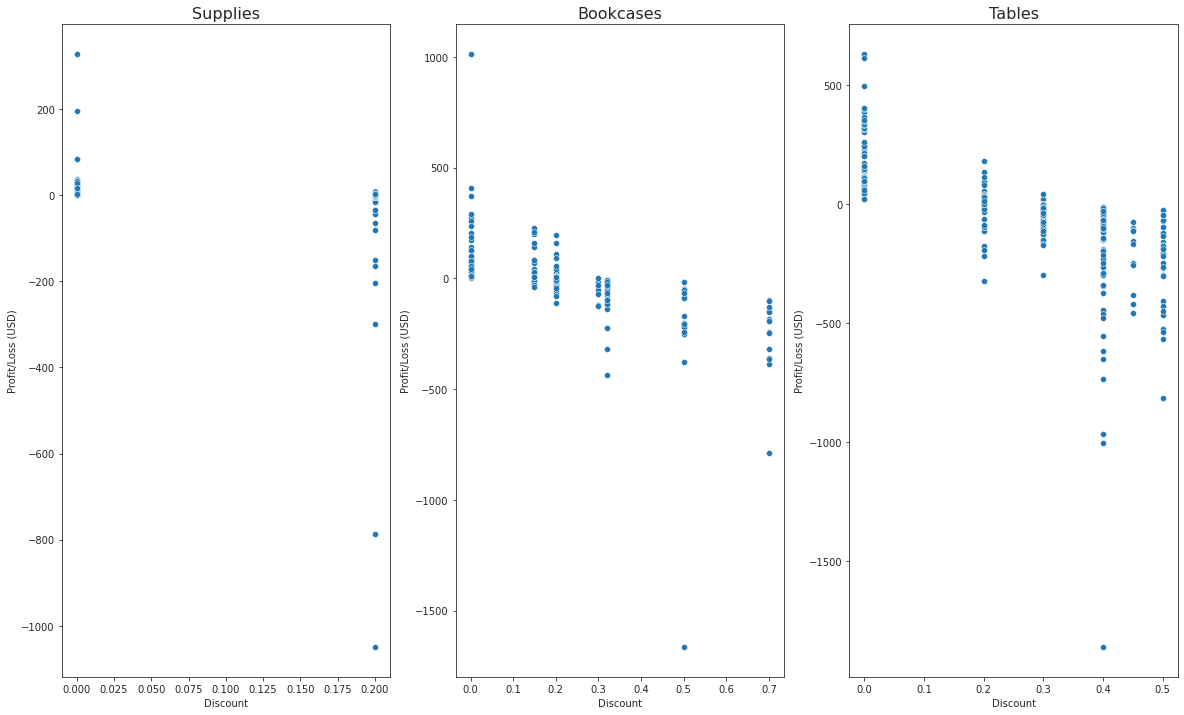

In [ ]:
subcat_supplies = df_superstore[df_superstore['Sub-Category'] == 'Supplies']
subcat_bookcases = df_superstore[df_superstore['Sub-Category'] == 'Bookcases']
subcat_tables = df_superstore[df_superstore['Sub-Category'] == 'Tables']

fig = plt.figure(figsize=(20,12))
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# Scatterplot keuntungan terhadap discount untuk sub-kategori supplies
sns.scatterplot(data=subcat_supplies, x='Discount', y='Profit', ax=ax1)
ax1.set_title('Supplies', size=16)
ax1.set_ylabel('Profit/Loss (USD)')

# Scatterplot keuntungan terhadap discount untuk sub-kategori bookcases
sns.scatterplot(data=subcat_bookcases, x='Discount', y='Profit', ax=ax2)
ax2.set_title('Bookcases', size=16)
ax2.set_ylabel('Profit/Loss (USD)')

# Scatterplot keuntungan terhadap discount untuk sub-kategori tables
sns.scatterplot(data=subcat_tables, x='Discount', y='Profit', ax=ax3)
ax3.set_title('Tables', size=16)
ax3.set_ylabel('Profit/Loss (USD)')

plt.show()

Analisis hubungan profit/rugi dengan diskon yang diberikan berdasarkan sub-kategori yang memiliki profit margin negatif.
- Sub-kategori *Supplies* akan menghasilkan profit apabila tidak diberikan diskon (diskon 0%), tetapi apabila diberikan diskon 20% maka akan mengalami kerugian.
- Sub-kategori *Bookcases* akan menghasilkan profit apabila tidak diberikan diskon. Jika diberikan diskon antara 10%-20% masih menghasilkan profit namun juga menghasilkan kerugian. Jika diberikan diskon di atas 20% maka akan mengalami kerugian.
- Sub-kategori *Tables* akan menghasilkan profit apabila tidak diberikan diskon. Jika diberikan diskon 20%-30% maka profit akan berkurang dan kerugian akan meningkat. Jika diberikan diskon di atas 30% maka akan mengalami kerugian.

Berdasarkan hasil analisis di atas, ketiga sub-kategori tersebut akan tetap profit jika tidak diberikan diskon, namun apabila diskon yang diberikan ditambah akan mengalami kerugian atau menyebabkan profit margin negatif. Oleh karena itu, jika ingin menjual ketiga sub-kategori produk tersebut dan tetap mendapat profit maka tidak diberikan diskon, tetapi jika ingin diberikan diskon maka harus dalam batasan nilai tertentu agar tidak mengalami kerugian.

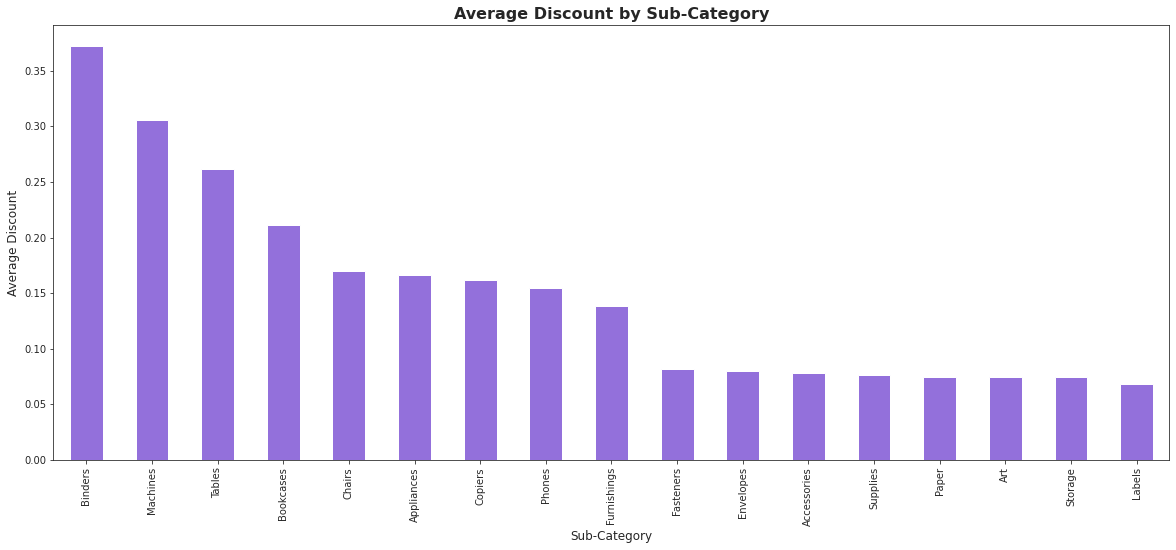

In [ ]:
# Barplot untuk menunjukkan rata-rata diskon berdasarkan sub-kategori
subcat_discount = df_superstore.groupby('Sub-Category')['Discount'].mean().sort_values(ascending=False)
plot = subcat_discount.plot(kind='bar', figsize=(20, 8), color='mediumpurple')
plt.title('Average Discount by Sub-Category', fontsize=16, fontweight='bold')
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Average Discount', fontsize=12)
plt.show()

Hasil observasi diskon rata-rata berdasarkan kategori:
1. Office Supplies
  - Secara keseluruhan kebanyakan sub-kategori produk dalam kategori ini memberikan diskon rata-rata kurang dari 10%, hanya sub-kategori *Binders* dan *Appliances* yang memberikan diskon rata-rata di atas 10%.
  -  Sub-kategori *Binders* merupakan produk yang memberikan diskon rata-rata tertinggi diantara semua sub-kategori yaitu sebesar 37.5%.

2. Furniture
  - Sub-kategori *Tables*, *Bookcases* dan *Chairs* termasuk dalam lima besar sub-kategori produk yang memberikan diskon rata-rata tertinggi yaitu di atas 15%. 
  - Sub-kategori *Tables* memberikan diskon rata-rata di atas 25% dan menjadi yang tertinggi dalam kategori ini. Sementara sub-kategori *Furnishings* menjadi yang terendah dengan memberikan diskon rata-rata di bawah 15%.

3. Technology
  - Sub-kategori *Machines* memberikan diskon rata-rata terbesar dalam kategori ini yaitu 30%. Sementara *Accessories* menjadi yang terendah yaitu di bawah 10%.

Analisis sub-kategori berdasarkan kategori, total penjualan, profit, *profit margin* dan diskon:
1. Office Supplies
  - Secara keseluruhan, hampir semua sub-kategori dalam kategori ini memiliki profit margin positif (menghasilkan keuntungan). Hal ini dikarenakan sebagian besar sub-kategori memberikan diskon rata-rata di bawah 10%. 
  - Hanya sub-kategori *Supplies* yang memiliki profit margin negatif (menghasilkan kerugian). Hal ini dikarenakan beberapa produk sub-kategori *Supplies* memberikan diskon 20%.
  - Sub-kategori *Binders* memang memberikan diskon rata-rata tertinggi yaitu 37.5%, namun memiliki total penjualan dan profit yang cukup besar sehingga mampu menghasilkan profit margin yang positif.

2. Furniture
  - Sub-kategori *Tables* menghasilkan kerugian terbesar meskipun memiliki total penjualan yang cukup tinggi. Hal ini dikarenakan sub-kategori *Tables* memberikan diskon rata-rata di atas 25%.
  - Sub-kategori *Bookcases* menghasilkan kerugian meskipun memiliki total penjualan yang cukup tinggi. Hal ini dikarenakan sub-kategori *Bookcases* memberikan diskon rata-rata di atas 20%.
  - Produk dengan kategori *Furniture* memberikan diskon rata-rata yang tinggi tetapi menghasilkan profit dan profit margin yang rendah.

3. Technology
  - Sub-kategori *Machines* memiliki profit margin rendah sekitar 1.8% dikarenakan total penjualannya tinggi namun profit yang dihasilkan sangat rendah. Hal ini disebabkan, sub-kategori *Machines* memberikan diskon rata-rata 30% (tertinggi kedua dari semua sub-kategori).
  - Sub-kategori *Copiers*, *Phones* dan *Accessories* memiliki profit margin yang lebih besar daripada sub-kategori *Machines* karena menghasilkan profit yang tinggi dan ketiganya memberikan diskon rata-rata di bawah 20%.

#### Product Analysis

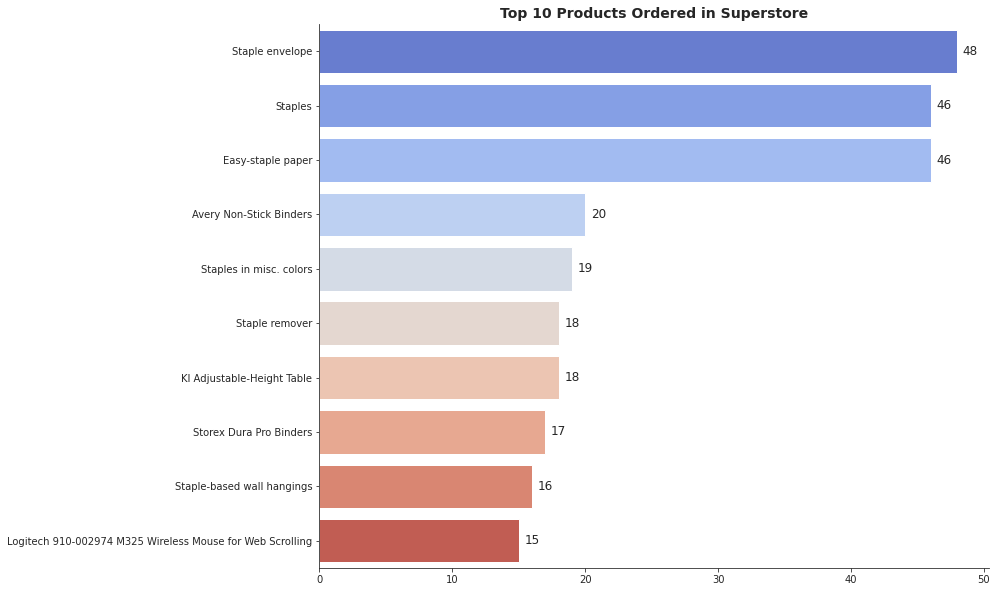

In [ ]:
# Menunjukkan 10 produk yang paling banyak dibeli
count_product = df_superstore['Product Name'].value_counts().head(10)

plt.figure(figsize=(12,10))
plot = sns.barplot(y=count_product.index, x=count_product.values, palette='coolwarm')
for bar in plot.patches:
  plot.annotate(format(bar.get_width(), '.0f'),
                (1+bar.get_width(), bar.get_y()+0.5*bar.get_height()),
                ha='center', va='center', size=12)
plt.title('Top 10 Products Ordered in Superstore', fontsize=14, fontweight='bold')
sns.despine()
plt.show()

Berdasarkan grafik di atas, 10 produk yang paling banyak dipesan sebagian besar merupakan produk dengan kategori *Office Supplies*. *Staple envelope*, *Staples*, *Easy-staple paper* menjadi tiga besar produk yang paling banyak dibeli dengan kuantitas penjualan di atas 45.

In [ ]:
product = df_superstore.groupby(['Product Name', 'Category', 'Sub-Category']).agg({'Sales':'sum', 'Quantity':'sum', 'Profit':'sum'})
profit_product = product[product['Profit'] > 0].sort_values('Profit', ascending = False)
loss_product = product[product['Profit'] < 0].sort_values('Profit')
neutral_product = product[product['Profit'] == 0]

print('Total Products      :', product.shape[0],'\n')
print('Profitable Product  :', profit_product.shape[0])
print('Total Profit from profitable product : {} USD\n'.format(round(profit_product['Profit'].sum(), 2)))
print('Unprofitable Product:', loss_product.shape[0])
print('Total Loss from unprofitable product : {} USD\n'.format(round(loss_product['Profit'].sum(), 2)))
print('Product with zero profit:', neutral_product.shape[0])

Total Products      : 1850 

Profitable Product  : 1546
Total Profit from profitable product : 363465.4 USD

Unprofitable Product: 301
Total Loss from unprofitable product : -77068.38 USD

Product with zero profit: 3


Dari 1850 jenis produk yang dijual oleh *Superstore*, 1546 produk menghasilkan total keuntungan sebesar 363465 USD,  301 produk menghasilkan total kerugian sebesar 77068 USD dan 3 produk tidak menghasilkan keuntungan maupun kerugian. 

In [ ]:
# Menunjukkan 10 produk yang menghasilkan keuntungan terbesar
profit_product.head(10)

,,,Sales,Quantity,Profit
Product Name,Category,Sub-Category,,,
Canon imageCLASS 2200 Advanced Copier,Technology,Copiers,61599.824,20,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,Office Supplies,Binders,27453.384,31,7753.0390
Hewlett Packard LaserJet 3310 Copier,Technology,Copiers,18839.686,38,6983.8836
Canon PC1060 Personal Laser Copier,Technology,Copiers,11619.834,19,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",Technology,Machines,18374.895,12,4094.9766
Ativa V4110MDD Micro-Cut Shredder,Technology,Machines,7699.890,11,3772.9461
"3D Systems Cube Printer, 2nd Generation, Magenta",Technology,Machines,14299.890,11,3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System,Technology,Accessories,9367.290,24,3696.2820
Ibico EPK-21 Electric Binding System,Office Supplies,Binders,15875.916,13,3345.2823


- 8 dari 10 produk yang menghasilkan profit tertinggi merupakan produk dengan kategori *Technology* yang didominasi oleh sub-kategori *Copiers* dan *Machines*.
- *Canon imageCLASS 2200 Advanced Copier* menjadi produk yang menghasilkan profit tertinggi sebesar 25199.93 USD.

In [ ]:
# Menunjukkan 10 produk yang menghasilkan kerugian terbesar
loss_product.head(10)

,,,Sales,Quantity,Profit
Product Name,Category,Sub-Category,,,
Cubify CubeX 3D Printer Double Head Print,Technology,Machines,11099.963,9,-8879.9704
Lexmark MX611dhe Monochrome Laser Printer,Technology,Machines,16829.901,18,-4589.9730
Cubify CubeX 3D Printer Triple Head Print,Technology,Machines,7999.980,4,-3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,Furniture,Tables,9917.640,27,-2876.1156
Bush Advantage Collection Racetrack Conference Table,Furniture,Tables,9544.725,33,-1934.3976
GBC DocuBind P400 Electric Binding System,Office Supplies,Binders,17965.068,27,-1878.1662
Cisco TelePresence System EX90 Videoconferencing Unit,Technology,Machines,22638.480,6,-1811.0784
Martin Yale Chadless Opener Electric Letter Opener,Office Supplies,Supplies,16656.200,22,-1299.1836
Balt Solid Wood Round Tables,Furniture,Tables,6518.754,19,-1201.0581


Dari 10 produk dengan kerugian terbesar, *Cubify CubeX 3D Printer Double Head Print* merupakan produk yang menghasilkan kerugian tertinggi sebesar 8879.97 USD.

In [ ]:
# Menunjukkan produk yang tidak menghasilkan keuntungan maupun kerugian
neutral_product.head()

,,,Sales,Quantity,Profit
Product Name,Category,Sub-Category,,,
"Alliance Big Bands Rubber Bands, 12/Pack",Office Supplies,Fasteners,29.70,15,0.0
"Avery Trapezoid Extra Heavy Duty 4"" Binders",Office Supplies,Binders,314.55,15,0.0
Belkin OmniView SE Rackmount Kit,Office Supplies,Storage,248.36,7,0.0


Terdapat 3 produk yang dijual oleh *Superstore* yang tidak menghasilkan keuntungan maupun kerugian. Produk tersebut yaitu *Alliance Big Bands Rubber Bands, 12/Pack*, *Avery Trapezoid Extra Heavy Duty 4" Binders* dan *Belkin OmniView SE Rackmount Kit*. Ketiganya merupakan produk dengan kategori *Office Supplies*. 

#### Customer Segment Analysis

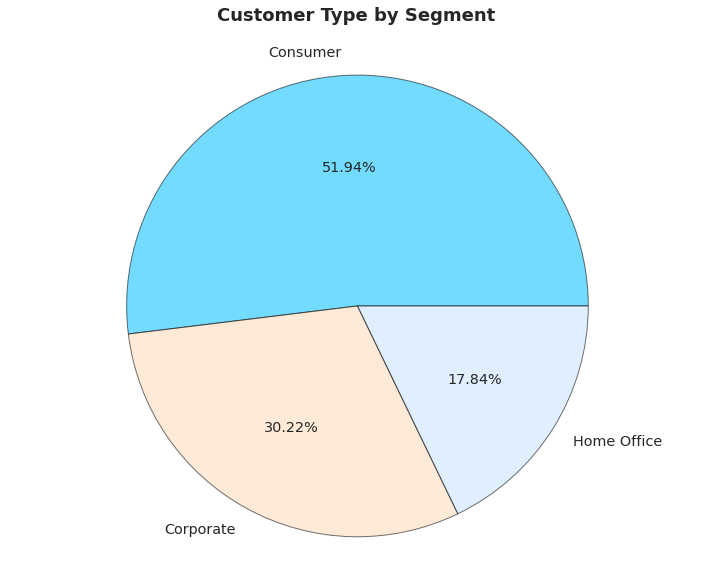

In [ ]:
# Pie chart perbandingan jumlah transaksi berdasarkan segmen pelanggan
segment = df_superstore['Segment'].value_counts()

plt.figure(figsize=(10,8))
labels = segment.index
colors = ['#00BFFF', '#FFDAB9', '#C6E2FF']
plt.pie(segment.values,
        labels = labels,
        autopct='%.2f%%',
        colors=colors,
        wedgeprops={'linewidth': 1, 'edgecolor':'black', 'alpha':0.55},
        textprops={'size': 'x-large'})
plt.title('Customer Type by Segment', fontsize=18, fontweight='bold', pad=30)
plt.axis('equal')
plt.tight_layout()
plt.show()

Segmen pelanggan *Consumer* menjadi yang paling besar mencakup 51.94% total pelanggan, diikuti *Corporate* sebesar 30.22% dan *Home Office* menjadi yang terendah sebesar 17.84%. Meskipun pelanggan dengan segmen *Consumer* menjadi yang paling banyak, perlu diperiksa lagi kinerja total penjualan dan profit yang dihasilkan untuk memastikan segmen pelanggan mana yang harus ditargetkan untuk meningkatkan penjualan.

In [ ]:
df_segment = df_superstore.groupby('Segment', as_index=False)[['Sales', 'Quantity', 'Profit']].sum()
df_segment['Profit Margin'] = df_segment['Profit'] / df_segment['Sales']
df_segment

,Segment,Sales,Quantity,Profit,Profit Margin
0,Consumer,1.161401e+06,19521,134119.2092,0.115481
1,Corporate,7.061464e+05,11608,91979.1340,0.130255
2,Home Office,4.296531e+05,6744,60298.6785,0.140343


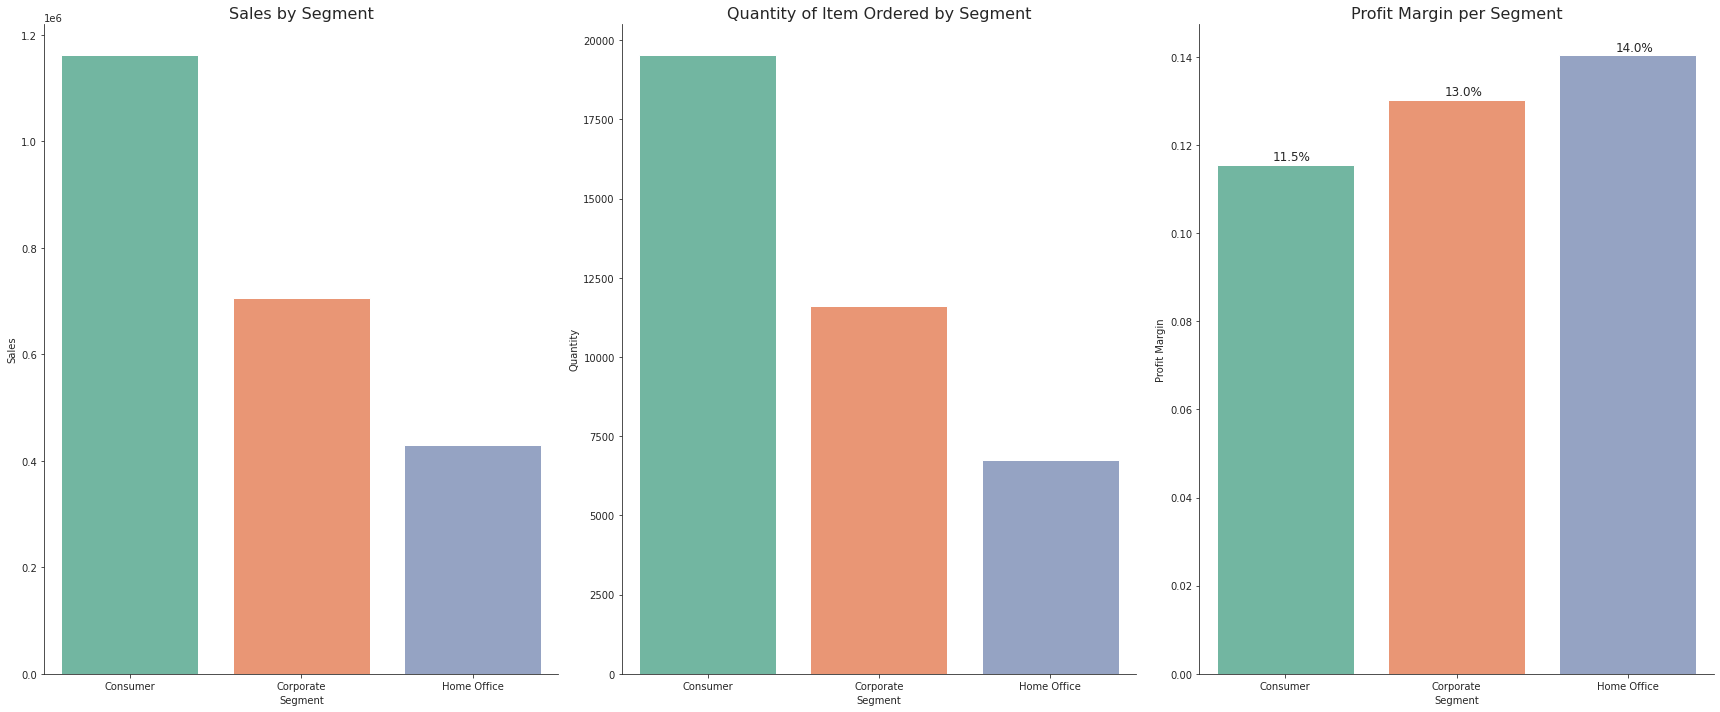

In [ ]:
# Menunjukkan total penjualan, jumlah barang yang dijual dan profit margin berdasarkan segmen pelanggan
fig = plt.figure(figsize=(24,10))
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# Barplot yang menunjukkan penjualan berdasarkan segmen pelanggan
sns.barplot(data=df_segment, x='Segment', y='Sales', palette='Set2', ax=ax1)
ax1.set_title('Sales by Segment', size=16)

# Barplot yang menunjukkan jumlah barang yang dibeli berdasarkan segmen pelanggan
sns.barplot(data=df_segment, x='Segment', y='Quantity', palette='Set2', ax=ax2)
ax2.set_title('Quantity of Item Ordered by Segment', size=16)

# Barplot yang Menunjukkan profit margin berdasarkan segmen pelanggan
sns.barplot(data=df_segment, x='Segment', y='Profit Margin', palette='Set2', ax=ax3)
for p in ax3.patches:
    x, _ = p.get_xy()
    ax3.annotate(f"{p.get_height()*100 :.1f}%", xy=(x+0.33, p.get_height()+0.001), size=12)
ax3.set_title('Profit Margin by Segment', size=16)

sns.despine()
plt.tight_layout()
plt.show()

- Segmen *Consumer* menghasilkan total penjualan tertinggi dan mereka memesan barang dengan kuantitas terbanyak dibandingkan segmen lainnya. Namun, memliki profit margin terendah yaitu sebesar 11.5%. Oleh karena itu, pemilik *Superstore* perlu menargetkan pelanggan segmen *Consumer* dalam menetapkan strategi pemasaran dan penjualan agar dapat meningkatkan profit margin.
- Segmen *Home Office* menghasilkan total penjualan terendah dan jumlah barang yang dipesan juga terendah dibandingkan segmen lainnya, tetapi memiliki profit margin tertinggi yaitu sebesar 14%. Hal ini menunjukkan segmen *Home Office* memiliki potensi yang lebih baik dalam menghasilkan profit dibandingkan segmen lainnya. Oleh karena itu, perlu dibuat strategi pemasaran dan penjualan guna meningkatkan pelanggan dari segmen *Home Office*.

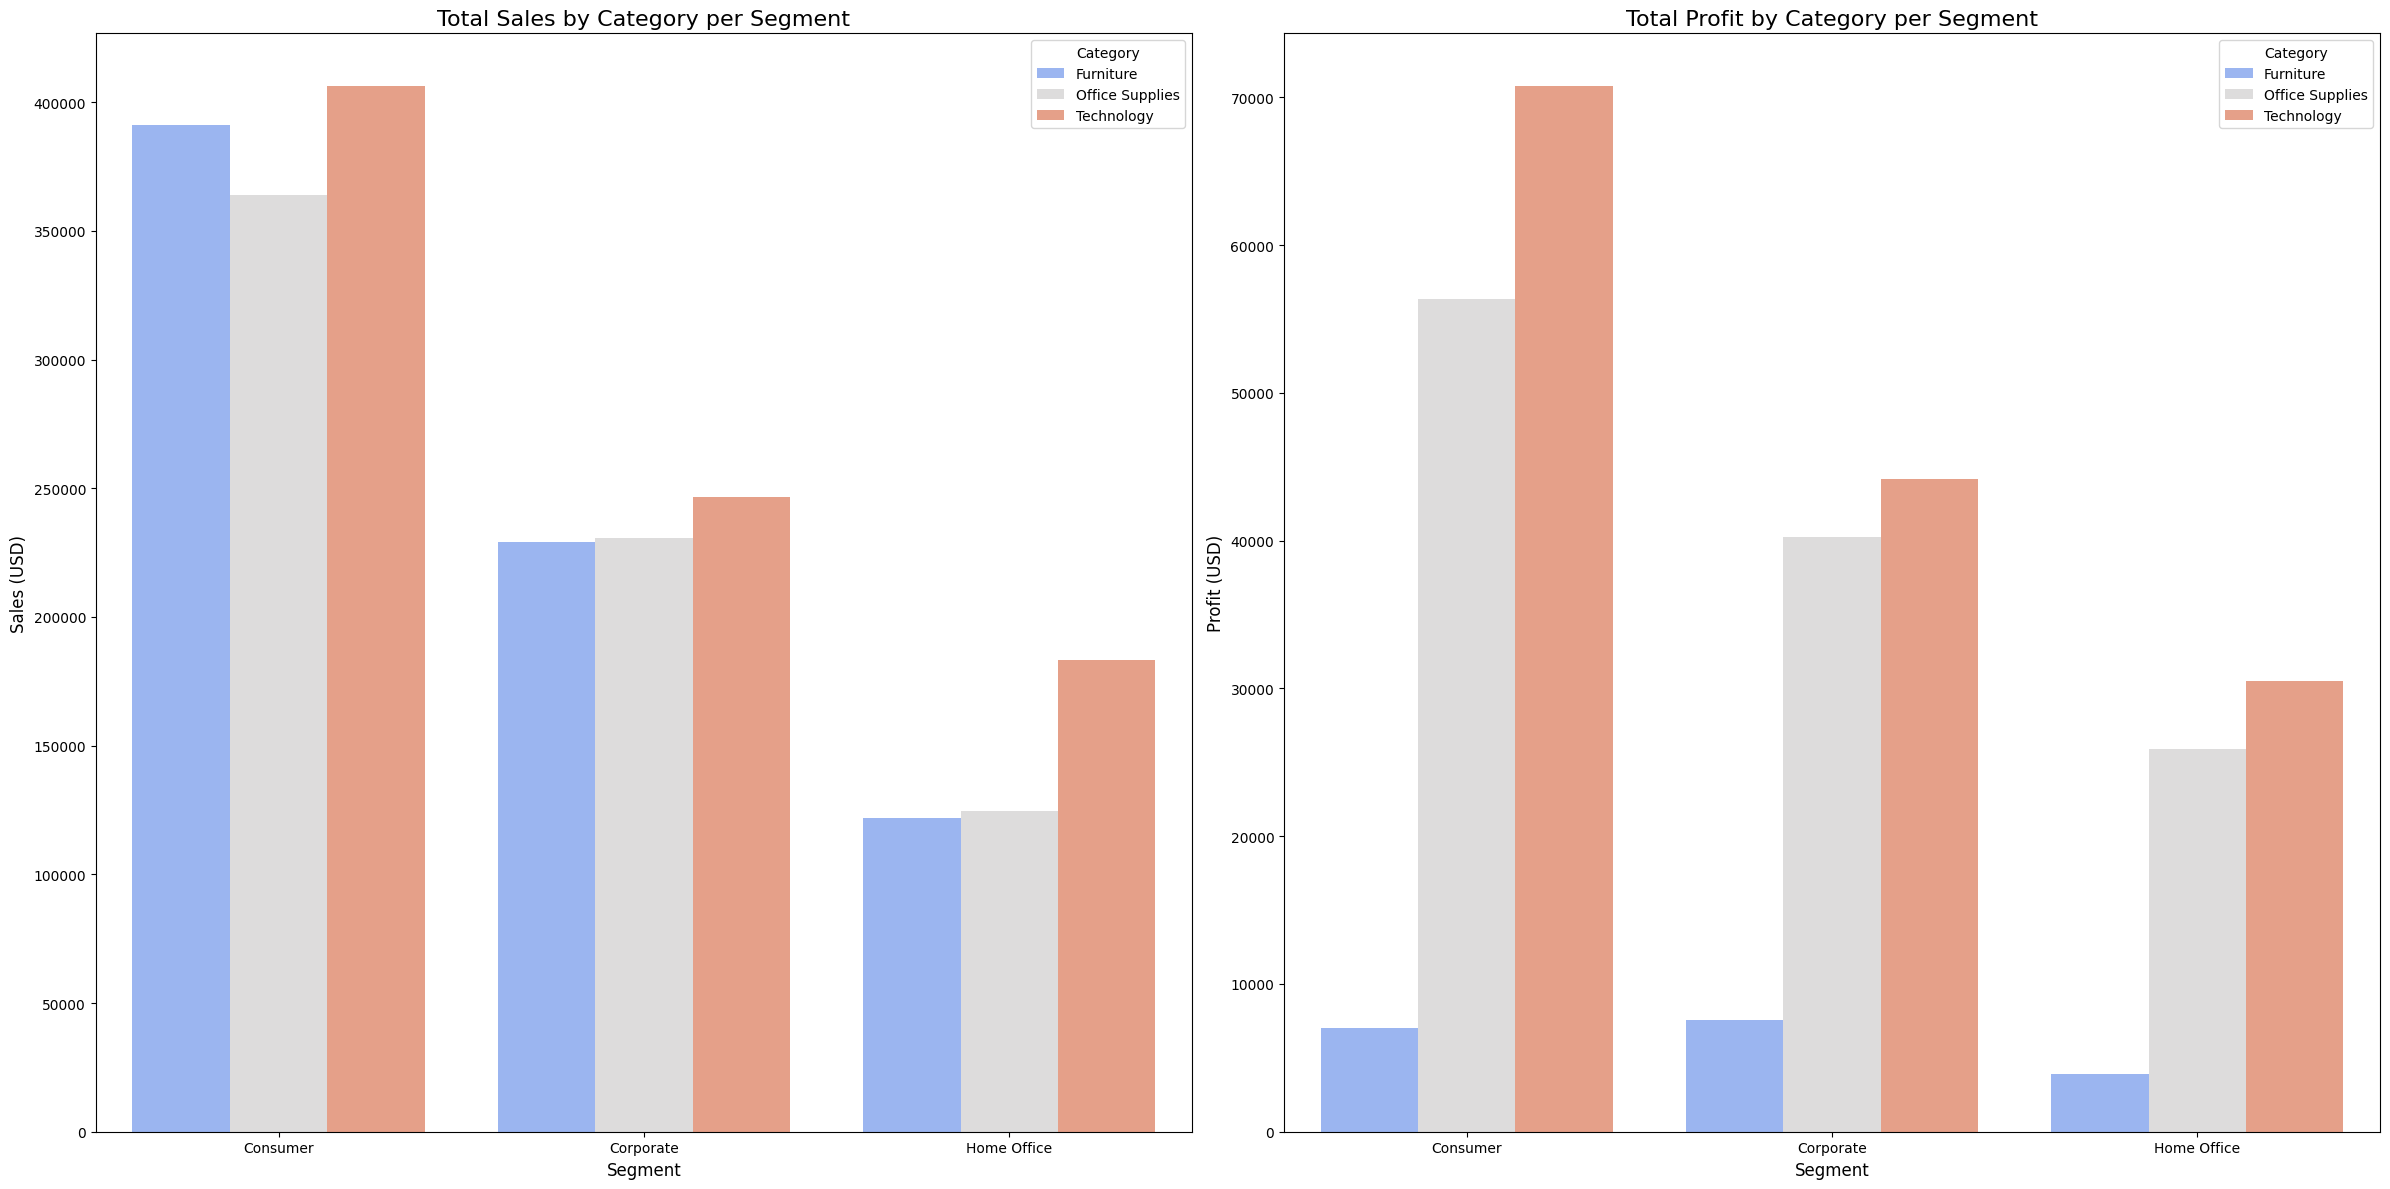

In [ ]:
fig = plt.figure(figsize=(24,12))
gs = GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Barplot yang menunjukkan total penjualan berdasarkan kategori untuk setiap segmen pelanggan
sns.barplot(data=df_superstore, x='Segment', y='Sales', hue='Category', estimator=np.sum, ci=None, palette='coolwarm', ax=ax1)
ax1.set_title('Total Sales by Category per Segment', fontsize=16)
ax1.set_xlabel('Segment', fontsize=12)
ax1.set_ylabel('Sales (USD)', fontsize=12)

# Barplot yang menunjukkan total profit berdasarkan kategori untuk setiap segmen pelanggan
sns.barplot(data=df_superstore, x='Segment', y='Profit', hue='Category', estimator=np.sum, ci=None, palette='coolwarm', ax=ax2)
ax2.set_title('Total Profit by Category per Segment', fontsize=16)
ax2.set_xlabel('Segment', fontsize=12)
ax2.set_ylabel('Profit (USD)', fontsize=12)

plt.tight_layout()
plt.show()

- Produk dengan kategori *Technology* menghasilkan total penjualan dan total profit tertinggi di semua segmen pelanggan. Hal ini menandakan produk dengan kategori *Technology* memiliki profit margin yang tinggi di semua segmen pelanggan.
- Produk dengan kategori *Furniture* menghasilkan total profit terendah di semua segmen pelanggan yaitu di bawah 10000 USD. Hal ini menandakan produk dengan kategori *Furniture* memiliki profit margin terendah di semua segmen pelanggan.
- Segmen *Consumer* memiliki profit margin terendah (11.5%) dibandingkan dengan segmen *Corporate* (13%) dan *Home Office* (14%). Hal ini dikarenakan segmen *Consumer* menghasilkan total penjualan yang tinggi, tetapi mendapat profit yang sangat rendah dari kategori produk *Furniture*. Oleh karena itu, perlu dikaji kembali dalam pemberian diskon pada produk kategori *Furniture* bagi segmen *Consumer* sehingga diharapkan dapat meningkatkan profit.

In [ ]:
subcategory_segment = df_superstore.groupby(['Segment', 'Sub-Category'], as_index=False)['Sales'].sum()
subcategory_segment = subcategory_segment.pivot('Sub-Category', 'Segment', 'Sales')

def highlight_max(s):
    is_large = s.nlargest(2).values
    return ['background-color: orange' if v in is_large else '' for v in s]
subcategory_segment.style.apply(highlight_max)

Segment,Consumer,Corporate,Home Office
Sub-Category,,,
Accessories,87105.238000,48190.564000,32084.516000
Appliances,52819.581000,36588.683000,18123.897000
Art,14251.930000,8590.448000,4276.414000
Binders,118161.009000,51560.313000,33691.411000
Bookcases,68632.729000,34005.924300,12241.343000
Chairs,172862.742000,99140.878000,56445.483000
Copiers,69819.070000,46829.386000,32879.574000
Envelopes,7771.146000,5942.670000,2762.586000
Fasteners,1680.942000,783.290000,560.048000


- *Chairs* dan *Phones* menjadi sub-kategori produk yang menghasilkan total penjualan terbesar di setiap segmen pelanggan. 
- *Chairs* merupakan sub-kategori produk yang menghasilkan total penjualan tertinggi pada segmen *Consumer* dan *Corporate*. Sementara, *Phones* menjadi sub-kategori produk yang menghasilkan total penjualan tertinggi pada segmen *Home Office*.

#### Shipping Analysis

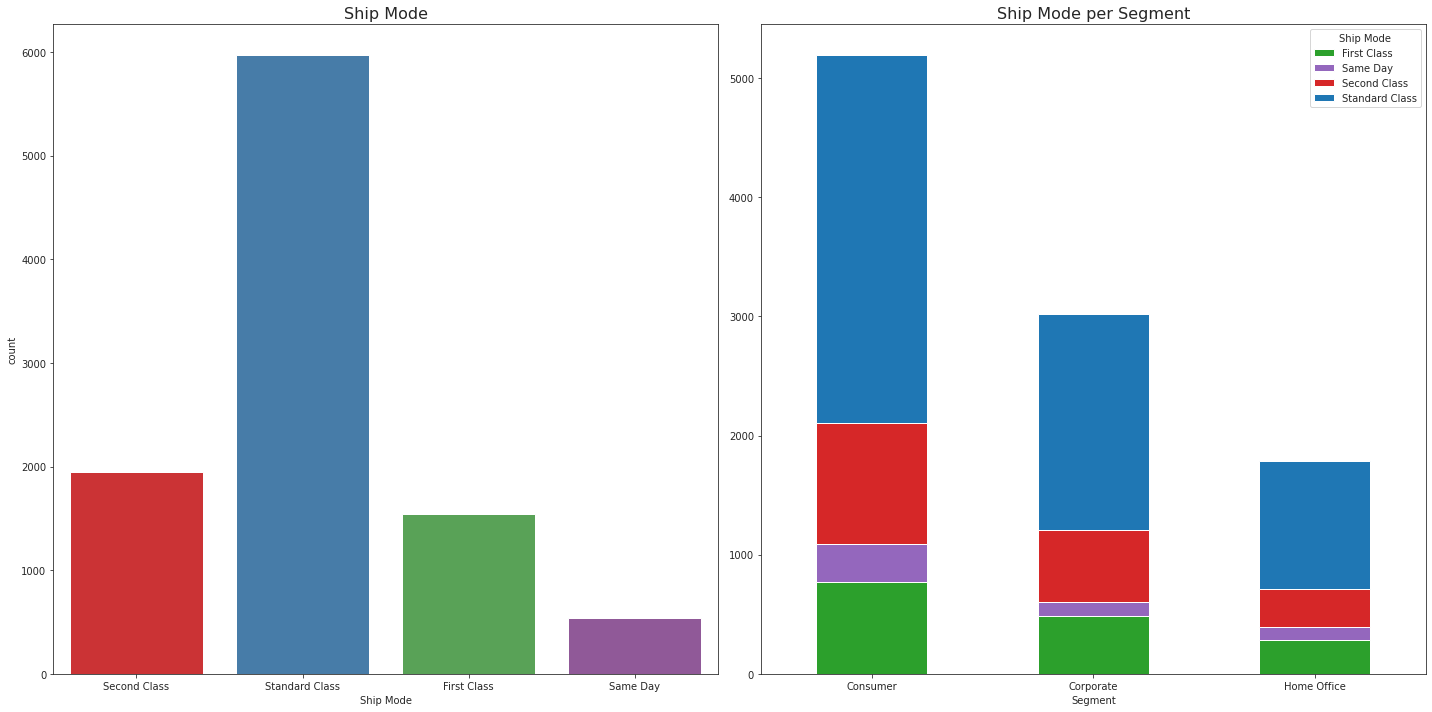

In [ ]:
# Menunjukkan jumlah transaksi berdasarkan jenis pengiriman
fig = plt.figure(figsize=(20,10))
gs = GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Countplot untuk jenis pengiriman
sns.countplot(data=df_superstore, x='Ship Mode', palette='Set1', ax=ax1)
ax1.set_title('Ship Mode', size=16)

# Stacked bar plot untuk jenis pengiriman berdasarkan Segmen pelanggan
ship = df_superstore.groupby(['Ship Mode', 'Segment']).size().reset_index().pivot(columns='Ship Mode', index='Segment', values=0)
plot = ship.plot(kind='bar', stacked=True, color=['tab:green', 'tab:purple', 'tab:red', 'tab:blue'], ax=ax2)
for tick in plot.get_xticklabels():
    tick.set_rotation(0)
ax2.set_title('Ship Mode per Segment', size=16)

plt.tight_layout()
plt.show()

- *Standard Class* menjadi jenis pengirimin yang paling banyak digunakan (sekitar 6000 transaksi) sementara jenis pengiriman *Same Day* paling sedikit digunakan (di bawah 500 transaksi).
- Semua segmen pelanggan lebih menyukai jenis pengiriman *Standard Class* sedangkan *Same Day* menjadi yang kurang diminati.

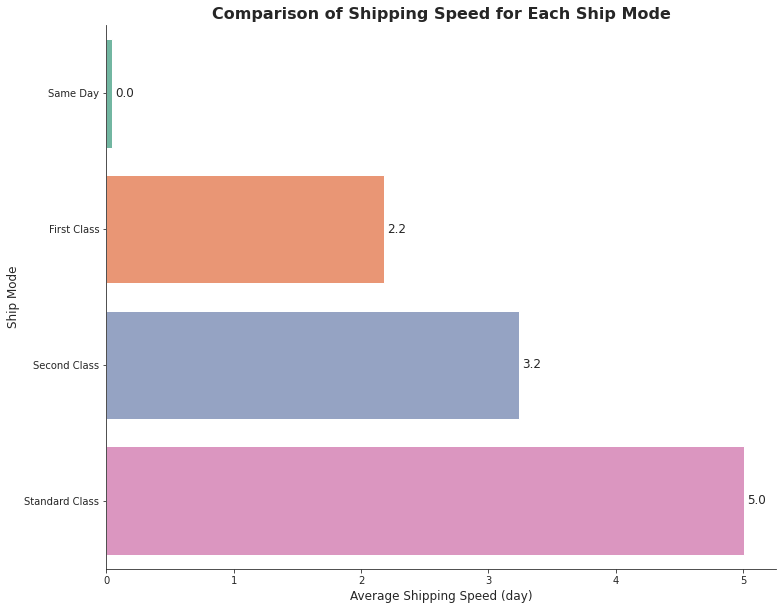

In [ ]:
# Membuat variabel baru hasil pengurangan Ship Date dengan Order Date
df_superstore['Shipping Speed'] = (df_superstore['Ship Date'] - df_superstore['Order Date']).dt.days

# Membuat dataframe yang menunjukkan kecepatan rata-rata pengiriman berdasarkan jenis pengiriman
ship_speed = df_superstore.groupby('Ship Mode', as_index=False)['Shipping Speed'].mean().sort_values('Shipping Speed')

# Membuat barplot perbandingan antara kecepatan pengiriman berdasarkan jenis pengiriman
plt.figure(figsize=(12,10))
plot = sns.barplot(data=ship_speed, x='Shipping Speed', y='Ship Mode', palette='Set2')
for bar in plot.patches:
  plot.annotate(format(bar.get_width(), '.1f'),
                (0.1+bar.get_width(), bar.get_y()+0.5*bar.get_height()),
                ha='center', va='center', size=12)
sns.despine()
plt.title('Comparison of Shipping Speed for Each Ship Mode', fontsize=16, fontweight='bold')
plt.xlabel('Average Shipping Speed (day)', fontsize=12)
plt.ylabel('Ship Mode', fontsize=12)
plt.show()

Jenis pengiriman *Standard Class* memiliki kecepatan pengiriman rata-rata paling lama yaitu lima hari. Sedangkan *Same Day* merupakan jenis pengiriman tercepat karena barang akan dikirimkan pada hari yang sama dengan hari pemesanan barang tersebut.

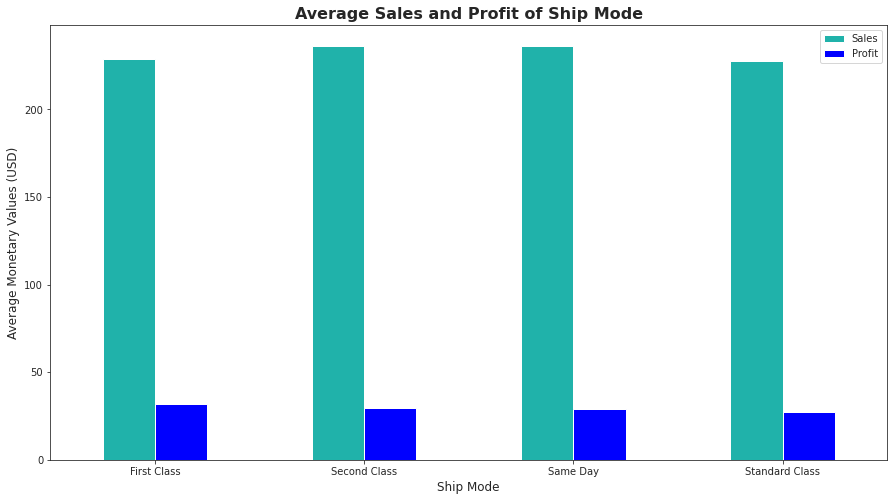

In [ ]:
# Rata-rata penjualan dan profit berdasarkan jenis pengiriman
df_ship = df_superstore.groupby('Ship Mode')[['Sales', 'Profit']].mean()
plot = df_ship.sort_values('Profit', ascending=False).plot(kind='bar', figsize=(15, 8), color=['lightseagreen','blue'])
for tick in plot.get_xticklabels():
    tick.set_rotation(0)
plt.title('Average Sales and Profit of Ship Mode', fontsize=16, fontweight='bold')
plt.xlabel('Ship Mode', fontsize=12)
plt.ylabel('Average Monetary Values (USD)', fontsize=12)
plt.show()

Semua jenis pengiriman (*ship mode*) memiliki total penjualan dan profit yang hampir sama. Ini mengindikasikan bahwa pemilihan *ship mode* memiliki pengaruh yang kecil terhadap profit yang dihasilkan. 

#### Geospatial Analysis

##### Region Analysis

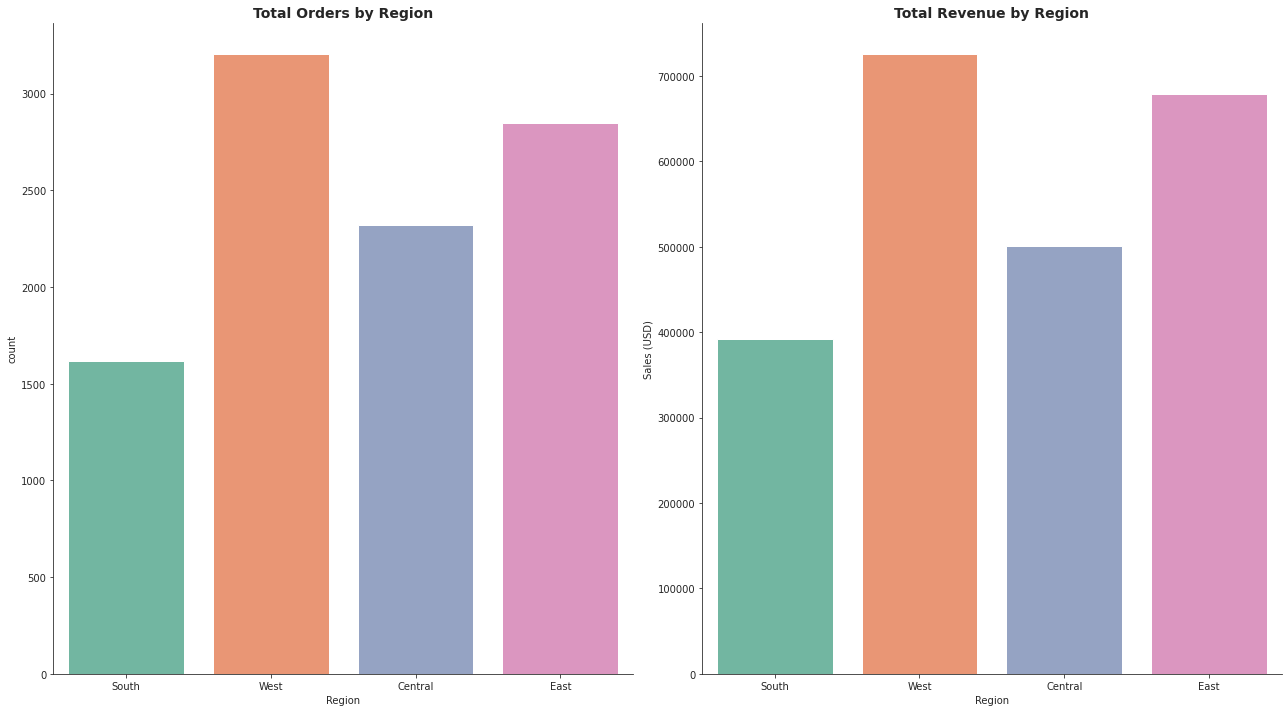

In [ ]:
# Menunjukkan total transaksi dan total penjualan berdasarkan region
fig = plt.figure(figsize=(18,10))
gs = GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Countplot yang menunjukkan total transaksi berdasarkan region
sns.countplot(data=df_superstore, x='Region', palette='Set2', ax=ax1)
ax1.set_title('Total Orders by Region', size=14, fontweight='bold')

# Barplot yang menunjukkan total penjualan berdasarkan region
sns.barplot(data=df_superstore, x='Region', y='Sales', estimator=np.sum, palette='Set2', ci=None, ax=ax2)
ax2.set_title('Total Revenue by Region', size=14, fontweight='bold')
ax2.set_ylabel('Sales (USD)')

sns.despine()
plt.tight_layout()
plt.show()

- Wilayah Barat *United States* memiliki jumlah transaksi penjualan tertinggi yaitu di atas 3000 transaksi. Hal ini sebanding dengan total penjualan yang dihasilkan juga menjadi yang tertinggi (di atas 700000 USD) dibandingkan wilayah lainnya.
- Wilayah Selatan *United States* memiliki jumlah transaksi penjualan terendah (di bawah 2000 transaksi) serta menghasilkan total penjualan yang juga terendah (di bawah 400000 USD) dibandingkan wilayah lainnya.


In [ ]:
df_region = df_superstore.groupby('Region')[['Sales', 'Profit']].mean()
df_region

,Sales,Profit
Region,,
Central,215.772661,17.092709
East,238.336110,32.135808
South,241.803645,28.857673
West,226.493233,33.849032


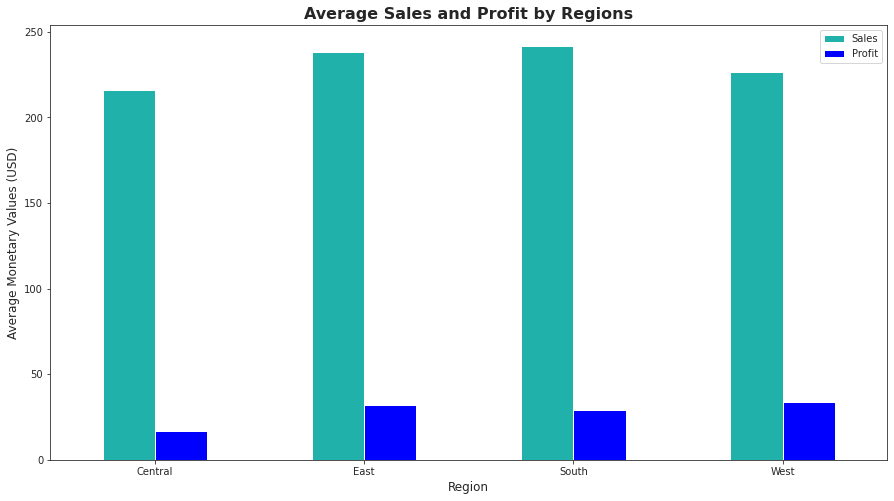

In [ ]:
# Rata-rata penjualan dan profit berdasarkan wilayah (region)
plot = df_region.plot(kind='bar', figsize=(15, 8), color=['lightseagreen','blue'])
for tick in plot.get_xticklabels():
    tick.set_rotation(0)
plt.title('Average Sales and Profit by Regions', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Monetary Values (USD)', fontsize=12)
plt.show()

Semua wilayah memilki penjualan rata-rata dan profit rata-rata yang hampir sama. Hal ini mengindikasikan bahwa wilayah memiliki pengaruh yang kecil terhadap profit/keuntungan.

##### State Analysis

In [ ]:
order_state = pd.Dataframe

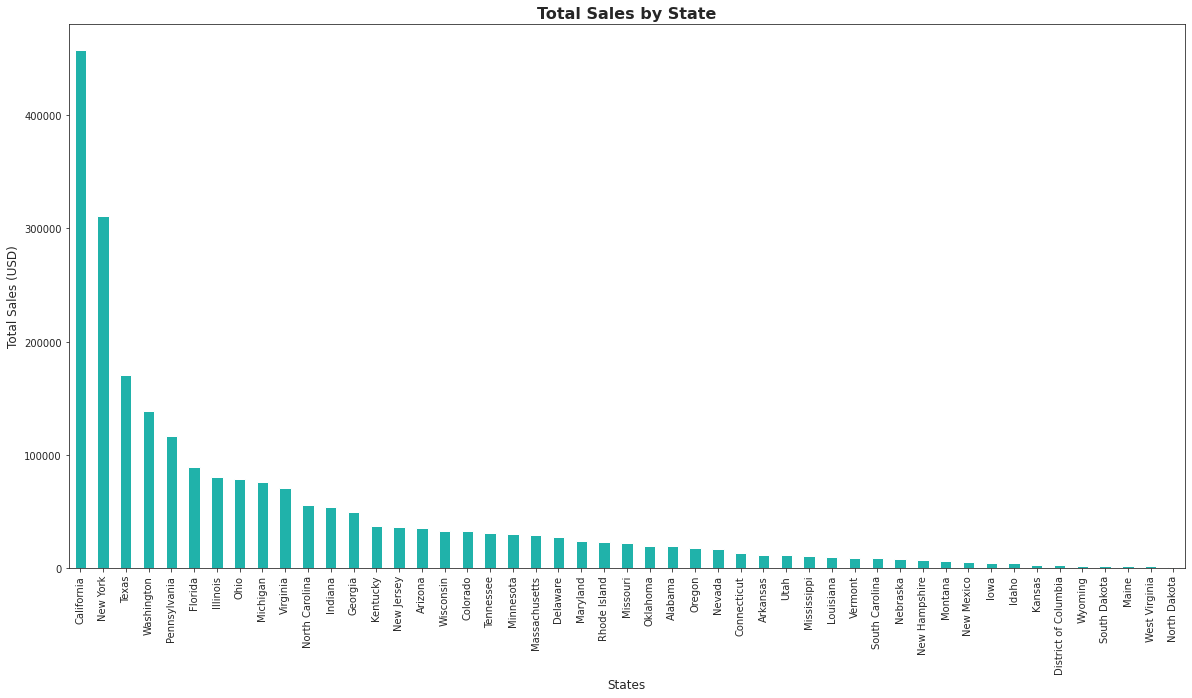

In [ ]:
sales_state = df_superstore.groupby('State')['Sales'].sum().sort_values(ascending=False)
plot = sales_state.plot(kind='bar', figsize=(20, 10), color='lightseagreen')
plt.title('Total Sales by State', fontsize=16, fontweight='bold')
plt.xlabel('States', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.show()

- *Superstore* memiliki penjualan tertinggi di negara bagian *California* dengan total penjualan lebih dari 450000 USD. Diikuti *New York* di posisi kedua dengan total penjualan sekitar 310000 USD dan *Texas* di posisi ketiga dengan total penjualan sekitar 170000 USD.
- Dari 49 negara bagian, hayan 5 negara bagian yang memiliki total penjualan di atas 100000 USD sementara negara bagian lain memiliki total penjualan di bawah 100000 USD. Kelima negara tersebut yaitu *California*, *New York*, *Texas*, *Washington* dan *Pennsylvania*.
- Negara bagian *Wyoming*, *South Dakota*, *Maine*, *West Virginia* dan *North Dakota* memiliki total penjualan terendah. Oleh karena itu, strategi pemasaran harus ditingkatkan di area ini dan di area yang total penjualannya masih di bawah 100000 USD.

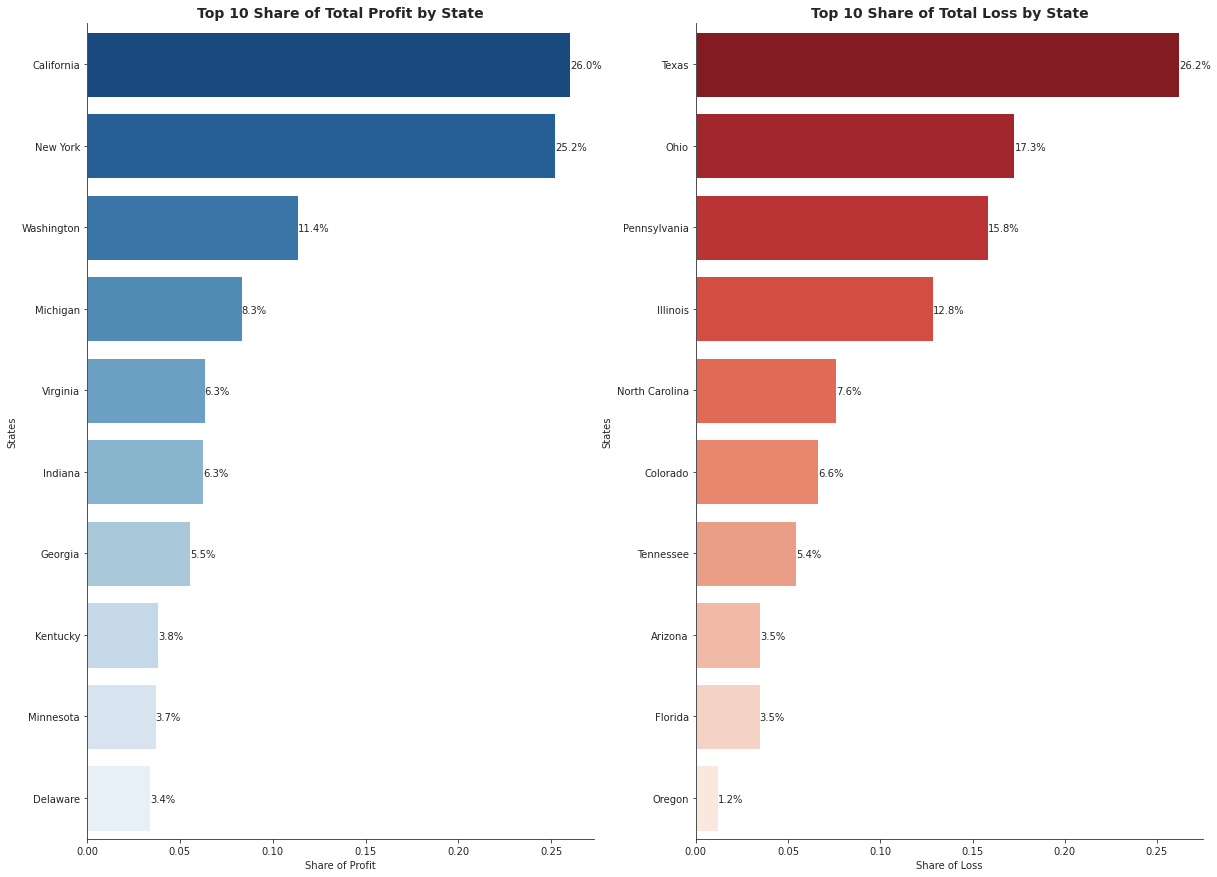

In [ ]:
state = df_superstore.groupby('State', as_index=False).sum()
profitable_state = state[state['Profit'] > 0].sort_values('Profit', ascending=False)[:10]
profitable_state['Share of Profit'] = profitable_state['Profit'] / profitable_state['Profit'].sum()
loss_state =  state[state['Profit'] < 0].sort_values('Profit')[:10]
loss_state['Share of Loss'] = loss_state['Profit'] / loss_state['Profit'].sum()

# Menunjukkan keuntungan dan kerugian berdasarkan negara bagian (state)
fig = plt.figure(figsize=(20,15))
gs = GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Barplot yang menunjukkan total transaksi berdasarkan region
sns.barplot(data=profitable_state, x='Share of Profit', y='State', palette='Blues_r', ax=ax1)
for p in ax1.patches:
        _, y = p.get_xy()
        ax1.annotate(f"{p.get_width()*100 :.1f}%", xy=(p.get_width(), y+0.45))
ax1.set_title('Top 10 Share of Total Profit by State', size=14, fontweight='bold')
ax1.set_ylabel('States')

# Barplot yang menunjukkan total penjualan berdasarkan region
sns.barplot(data=loss_state, x='Share of Loss', y='State', palette='Reds_r', ax=ax2)
for p in ax2.patches:
        _, y = p.get_xy()
        ax2.annotate(f"{p.get_width()*100 :.1f}%", xy=(p.get_width(), y+0.45))
ax2.set_title('Top 10 Share of Total Loss by State', size=14, fontweight='bold')
ax2.set_ylabel('States')

sns.despine()
plt.show()

- *California* dan *New York* menjadi negara bagian yang menghasilkan profit tertinggi yaitu di atas 25% dari total profit keseluruhan. Hal ini selaras dengan besarnya total penjualan yang dihasilkan di mana kedua negara tersebut juga memiliki total penjualan tertinggi. 
- *Texas* menjadi negara bagian dengan total penjualan tertinggi ketiga, tetapi juga menjadi negara bagian yang paling banyak menghasilkan kerugian. Lebih dari 25% total kerugian berasal dari *Texas*.

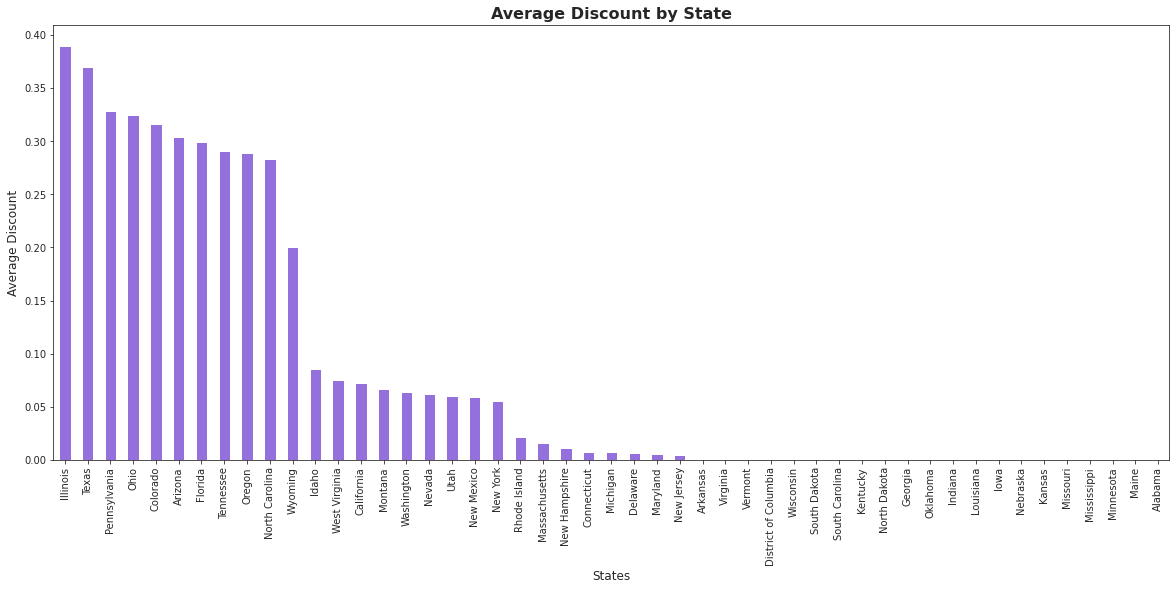

In [ ]:
# Barplot untuk menunjukkan rata-rata diskon berdasarkan Negara Bagian (State)
state_discount = df_superstore.groupby('State')['Discount'].mean().sort_values(ascending=False)
plot = state_discount.plot(kind='bar', figsize=(20, 8), color='mediumpurple')
plt.title('Average Discount by State', fontsize=16, fontweight='bold')
plt.xlabel('States', fontsize=12)
plt.ylabel('Average Discount', fontsize=12)
plt.show()

- Dari 49 negara bagian, hanya 11 negara bagian yang memberikan diskon rata-rata di atas 10%, sementara 17 negara bagian lainnya memberikan diskon rata-rata di bawah 10% dan 21 negara bagian tidak memberikan diskon.
- *Illinois* dan *Texas* menjadi negara bagian yang memberikan diskon rata-rata di atas 35%.


Analisis nagara bagian berdasarkan total penjualan, profit dan diskon :
- *California* menjadi negara bagian yang menghasilkan total penjualan dan total profit terbesar di *United States*. *California* memberikan diskon rata-rata di bawah 10%, ini menjadi salah satu alasan utama yang menyebabkan total pendapatan dan total profit menjadi yang tertinggi. Hal ini menunjukkan bahwa strategi promosi dengan menawarkan sedikit diskon sangat efektif di negara bagian *California*.
- *Texas* menjadi negara bagian dengan total penjualan tertinggi ketiga, tetapi juga menjadi negara bagian yang paling banyak menghasilkan kerugian. Lebih dari 25% total kerugian berasal dari *Texas*. Hal ini disebabkan *Texas* memberikan diskon rata-rata di atas 35% (tertinggi kedua). Oleh karena itu, *Superstore* disarankan untuk mengurangi pemberian diskon di *Texas* dan lebih baik beralih strategi promosi lainnya untuk meminimalkan kerugian.
- *Texas*, *Ohio*, *Pennsylvania* dan *Illinois* menjadi negara bagian yang menghasilkan kerugian terbesar di mana 72.1% total kerugian berasal dari keempat negara bagian tersebut. Hal ini disebabkan keempat negara bagian tersebut memberikan diskon rata-rata yang tinggi yaitu di atas 30%. Oleh karena itu, *Superstore* disarankan untuk mengurangi pemberian diskon di keempat negara bagian tersebut dan lebih baik beralih strategi promosi lainnya untuk meminimalkan kerugian.

#### Sales, Profit and Discount Analysis

##### Sales vs Profit

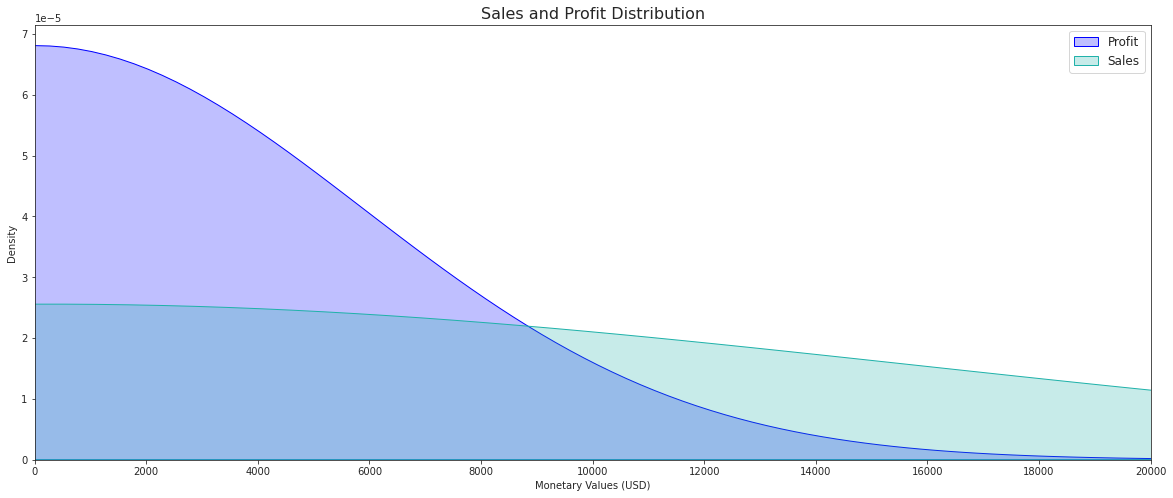

In [ ]:
# Membuat kde plot untuk menunjukkan distribusi penjualan dan profit
plt.figure(figsize=(20, 8))
sns.kdeplot(df_superstore['Profit'], color='blue', label='Profit', shade=True, bw=25)
sns.kdeplot(df_superstore['Sales'], color='lightseagreen', label='Sales', shade=True, bw=25)
plt.xlim(0, 20000)
xtick = list(np.arange(0, 22000, 2000))
plt.xticks(xtick)
plt.title('Sales and Profit Distribution', fontsize=16)
plt.xlabel('Monetary Values (USD)')
plt.ylabel('Density')
plt.legend(loc='upper right', fontsize='large')
plt.show()

- Berdasarkan grafik di atas, profit sebagian besar berada di atas penjualan mengindikasikan bisnis yang baik. Namun, perlu diperhatikan pada angka penjualan di atas 9000 USD, profit perlu ditingkatkan lagi.
- Transaksi yang paling banyak adalah transaksi pada nilai penjualan di bawah 1000 USD dan profit tertinggi diperoleh pada transaksi penjualan dengan nilai di bawah 500 USD.

##### Sales, Profit and Discount

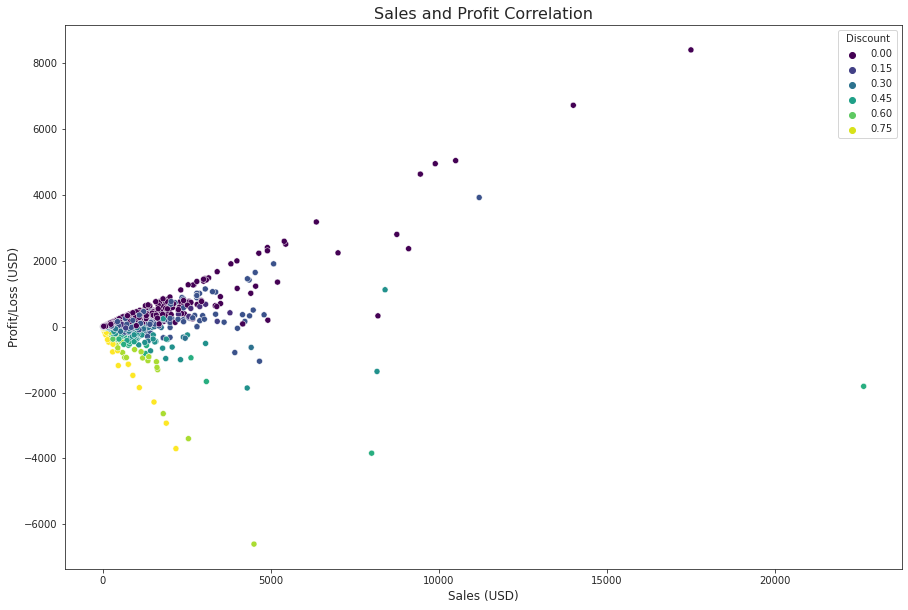

In [ ]:
# Scatterplot untuk menunjukkan korelasi antara penjualan dan profit
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_superstore, x='Sales', y='Profit', hue='Discount', palette='viridis')
plt.title('Sales and Profit Correlation', fontsize=16)
plt.xlabel('Sales (USD)', fontsize=12)
plt.ylabel('Profit/Loss (USD)', fontsize=12)
plt.show()

- Sebagian besar transaksi penjualan merupakan transaksi dengan nilai penjualan di bawah 5000 USD.
- Transaksi penjualan dengan nilai di bawah 2500 USD banyak menghasilkan kerugian. Sementara transaksi penjualan dengan nilai di atas 2500 USD cenderung menghasilkan profit. Oleh karena itu, perlu diperhatikan dalam pemberian diskon pada penjualan dengan nilai di bawah 2500 USD karena diskon merupakan salah satu faktor yang dapat menyebabkan kerugian.

##### Profit vs Discount

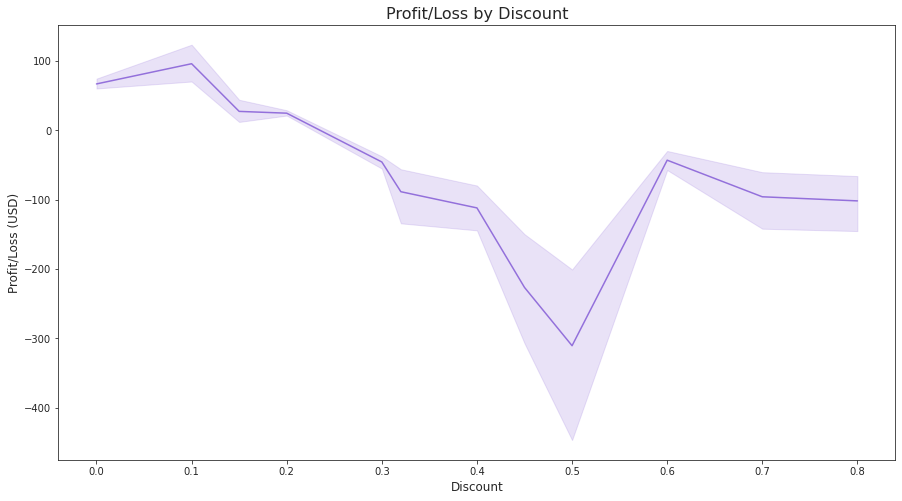

In [ ]:
# Lineplot untuk menunjukkan hubungan profit/loss yang dihasilkan pada tingkat diskon tertentu
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_superstore, x='Discount', y='Profit', color='mediumpurple')
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Profit/Loss (USD)', fontsize=12)
plt.title('Profit/Loss by Discount', fontsize=16)
plt.show()

- Kerugian akan terjadi jika diskon yang diberikan di atas 20%. Sementara ketika diskon yang diberikan antara 0% sampai 20% masih menghasilkan profit.
- Kerugian terbesar terjadi ketika diskon yang diberikan sekitar 50%.
- *Supertore* akan menghasilkan profit yang cukup tinggi ketika diskon yang diberikan kurang dari 10%. 

##### Discount and Non-Discount Analysis

In [ ]:
# Unit Price dan Unit Profit
df_superstore['Unit Price'] = round(df_superstore['Sales'] / df_superstore['Quantity'], 2)
df_superstore['Unit Profit'] = round(df_superstore['Profit'] / df_superstore['Quantity'], 2)

# Data transaksi dengan diskon
df_discount = df_superstore[df_superstore['Discount'] > 0]

# Data transaksi tanpa diskon
df_no_discount = df_superstore[df_superstore['Discount'] == 0]

print('In Total :')
print('Discounted Total Quantity is {}, without discount is {}'.format(df_discount['Quantity'].sum(), df_no_discount['Quantity'].sum()))
print('Discounted Total Sales is {} USD, without discount is {} USD'.format(round(df_discount['Sales'].sum(), 2), round(df_no_discount['Sales'].sum(), 2)))
print('Discounted Total Profit is {} USD, without discount is {} USD\n'.format(round(df_discount['Profit'].sum(), 2), round(df_no_discount['Profit'].sum(), 2)))

print('On Average :')
print('Discounted Quantity purchased per transaction is {}, without discount is {}'.format(round(df_discount['Quantity'].mean(), 2), round(df_no_discount['Quantity'].mean(), 2)))
print('Discounted Sales per transaction is {} USD, without discount is {} USD'.format(round(df_discount['Sales'].mean(), 2), round(df_no_discount['Sales'].mean(), 2)))
print('Discounted Unit Price is {} USD, without discount is {} USD'.format(round(df_discount['Unit Price'].mean(), 2), round(df_no_discount['Unit Price'].mean(), 2)))
print('Discounted Profit per transaction is {} USD, without discount is {} USD'.format(round(df_discount['Profit'].mean(), 2), round(df_no_discount['Profit'].mean(), 2)))
print('Discounted Unit Profit is {} USD, without discount is {} USD'.format(round(df_discount['Unit Profit'].mean(), 2), round(df_no_discount['Unit Profit'].mean(), 2)))

In Total :
Discounted Total Quantity is 19606, without discount is 18267
Discounted Total Sales is 1209292.39 USD, without discount is 1087908.47 USD
Discounted Total Profit is -34590.58 USD, without discount is 320987.6 USD

On Average :
Discounted Quantity purchased per transaction is 3.77, without discount is 3.81
Discounted Sales per transaction is 232.74 USD, without discount is 226.74 USD
Discounted Unit Price is 62.78 USD, without discount is 58.91 USD
Discounted Profit per transaction is -6.66 USD, without discount is 66.9 USD
Discounted Unit Profit is -1.23 USD, without discount is 17.58 USD


- Berdasarkan jumlah rata-rata per transaksi dan total barang yang dibeli, pelanggan lebih cenderung membeli lebih banyak produk saat ada diskon. Hal ini diperlihatkan dengan jumlah barang yang terjual saat diskon 1339 lebih banyak daripada saat tidak diberikan diskon, meskipun rata-rata barang yang dibeli setiap transaksi lebih kecil dibandingkan ketika tanpa diberikan diskon.
- Total penjualan dengan diskon (1209292 USD) lebih besar dibandingkan dengan total penjualan tanpa diskon (1087908 USD). Selain itu, rata-rata penjualan per transaksi saat ada diskon (233 USD) juga lebih besar dibandingkan tanpa diskon (227 USD). Hal ini mengindikasikan bahwa pelanggan  cenderung berbelanja lebih banyak saat ada diskon.
- Harga rata-rata produk yang didiskon (63 USD) lebih besar dibandingkan harga rata-rata produk tanpa diskon (59 USD). Ini menunjukkan bahwa diskon ditawarkan pada produk yang lebih mahal agar lebih mudah dijangkau.
-  Produk yang didiskon menghasilkan total kerugian sebesar 34591 USD sementara produk yang tidak didiskon menghasilkan total profit sebesar 320988 USD. Selain itu, produk yang didiskon mengalami kerugian sebesar 6.66 USD setiap transaksi sedangkan produk yang tidak didiskon menghasilkan profit sebesar 66.9 setiap transaksi. Hal ini mengindikasikan bahwa pemberian diskon sangat berpengaruh terhadap profit. Oleh karena itu, *Supertore* disarankan untuk mengurangi tingkat diskon sehingga dapat meminimalkan kerugian.

## Machine Learning
Dalam transaksi penjualan yang dilakukan oleh superstore, ada yang menghasilkan keuntungan dan kerugian. Keuntungan dan kerugian ini dapat dipengaruhi oleh faktor seperti produk, kategori, wilayah dan segmen pelanggan. Oleh karena itu, perlu dibuat model yang bisa memprediksi profit berdasarkan faktor-faktor tersebut sehingga dapat dijadikan salah satu acuan dalam mempersiapkan strategi bisnis yang tepat untuk meningkatkan profit dan mengurangi kerugian.


Model *multiple linear regression* digunakan untuk memprediksi atau
menganalisis variabel dependen berdasarkan lebih dari satu variabel
independen menggunakan regresi linear. Dalam hal ini, model tersebut akan digunakan untuk memprediksi profit berdasarkan beberapa *feature*/variabel independen pada data transaksi penjualan. Variabel independen yang digunakan untuk membangun model yaitu *Ship Mode*, *Segment*, *Region*, *Category*, *Sales*, *Quantity*, dan *Discount*.

### Preprocessing
Pada tahap ini akan dilakukan proses ***encoding*** untuk variabel kategorik (*Ship Mode*, *Segment*, *Region*, *Category*) dan proses ***scaling*** untuk variabel numerik (*Sales*, *Quantity*, dan *Discount*). ***Encoding*** merupakan suatu metode yang dapat diterapkan untuk merepresentasikan variabel kategorik dalam machine learning. Variabel kategorik akan di-*encoding* menggunakan metode ***One Hot Encoding***. Dalam *One Hot Encoding*, kita memecah suatu variabel kategorik menjadi beberapa variabel yang nilainya satu atau nol atau disebut juga *dummy variable*. Penggunaan ***drop = 'first'*** perlu dilakukan karena kita menggunakan model regresi linear. Khusus linear model, maksimal banyaknya *dummy variable* yang perlu dibuat adalah banyaknya kategori dikurangi satu. Hal ini dilakukan untuk menghindari masalah multikolinearitas. Sementara, ***Scaling*** adalah metode untuk melakukan transformasi terhadap data numerik agar antar variabel memiliki skala yang sama. Variabel numerik akan di-*scaling* dengan metode ***Robust Scaler***. ***Robust Scaler*** digunakan karena tidak sensitif terhadap *outlier*.

In [ ]:
# Melakukan proses encoding variabel kategorik dengan menggunakan One Hot Encoding dan scaling variabel numerik dengan menggunakan Robust Scaler
cat_features = ['Ship Mode','Segment','Region', 'Category']
num_features = ['Sales', 'Quantity', 'Discount']
# Menggabungkan proses preprocessing One Hot Encoding dan Robust Scaler dengan menggunakan ColumnTransformer()
transformer = ColumnTransformer([
                                 ('one hot encoder', OneHotEncoder(drop = 'first'), cat_features),
                                 ('robust scaler', RobustScaler(), num_features)
                                ], remainder = 'passthrough')

#### Data splitting

In [ ]:
# Membuat duplikat dataset yang akan digunakan untuk model
df = df_superstore.copy()

# Membuat dataset untuk variabel independen (X) dan variabel dependen/target(y)
X = df[cat_features + num_features]
y = df['Profit']

# Membagi dataset menjadi 4 bagian yaitu X_train, X_test, y_train dan y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

#### Data transform

In [ ]:
# Melakukan proses transformasi data (menerapkan proses encoding dan scaling pada data) 
X_train_preprocessed = transformer.fit_transform(X_train) # Proses fitting dan transform untuk X_train. Proses .fit hanya diterapkan untuk training set saja
X_test_preprocessed = transformer.transform(X_test) # Proses .transform pada X_test

In [ ]:
# Mengubah data hasil preprocessing ke bentuk dataframe
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)

In [ ]:
# Memberi nama kolom pada dataset hasil preprocessing
features = list(transformer.transformers_[0][1].get_feature_names()) + num_features
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features

# Menampilkan dataset hasil preprocessing
X_train_preprocessed

,x0_Same Day,x0_Second Class,x0_Standard Class,x1_Corporate,x1_Home Office,x2_East,x2_South,x2_West,x3_Office Supplies,x3_Technology,Sales,Quantity,Discount
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.341896,1.000000,-1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.372672,1.000000,-1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-0.205424,1.000000,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.111665,0.666667,-1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.124348,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7990,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.237879,0.666667,0.0
7991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.144773,2.000000,-1.0
7992,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.211921,0.666667,-1.0
7993,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.031284,1.333333,-1.0


### Model
Membangun arsitektural model multiple linear regression dengan Deep Neural Network (DNN).

In [ ]:
# Membuat Model Multiple Linear Regression dengan Deep Neural Network (DNN)
model = Sequential()
model.add(Dense(256, kernel_regularizer=regularizers.l2(0.0001), activation='relu', input_shape=(X_train_preprocessed.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(128, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

In [ ]:
# Mendapat rangkuman dari proses learning model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3584      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0005)

# Melakukan compile model
model.compile(optimizer = adam, loss = 'mse', metrics = ['mae'])

In [ ]:
# # Membuat callback EarlyStoping
# early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
# Melakukan proses fitting model
history = model.fit(
    X_train_preprocessed,
    y_train,
    validation_split = 0.25, 
    batch_size = 50,
    epochs = 300,
    verbose = 1
    # callbacks = [early_stop]
)

Epoch 1/300
120/120 [==============================] - 4s 18ms/step - loss: 39405.3984 - mae: 56.2296 - val_loss: 62074.3828 - val_mae: 57.3660
Epoch 2/300
120/120 [==============================] - 1s 9ms/step - loss: 33657.0312 - mae: 49.5064 - val_loss: 47585.9453 - val_mae: 45.3349
Epoch 3/300
120/120 [==============================] - 1s 9ms/step - loss: 27982.0449 - mae: 44.9652 - val_loss: 41788.2188 - val_mae: 47.0217
Epoch 4/300
120/120 [==============================] - 1s 8ms/step - loss: 24653.2676 - mae: 44.0426 - val_loss: 35175.3984 - val_mae: 42.9283
Epoch 5/300
120/120 [==============================] - 1s 9ms/step - loss: 24632.9883 - mae: 45.0465 - val_loss: 33761.3008 - val_mae: 43.3823
Epoch 6/300
120/120 [==============================] - 1s 12ms/step - loss: 22569.6152 - mae: 42.3339 - val_loss: 33661.2500 - val_mae: 42.6308
Epoch 7/300
120/120 [==============================] - 1s 8ms/step - loss: 23650.0234 - mae: 43.0072 - val_loss: 33262.9844 - val_mae: 41.43

### Model Evaluation

In [ ]:
# Evaluasi model pada train dataset
model.evaluate(X_train_preprocessed, y_train, verbose = 1)

250/250 [==============================] - 0s 2ms/step - loss: 5737.6567 - mae: 24.0838


[5737.65673828125, 24.083755493164062]

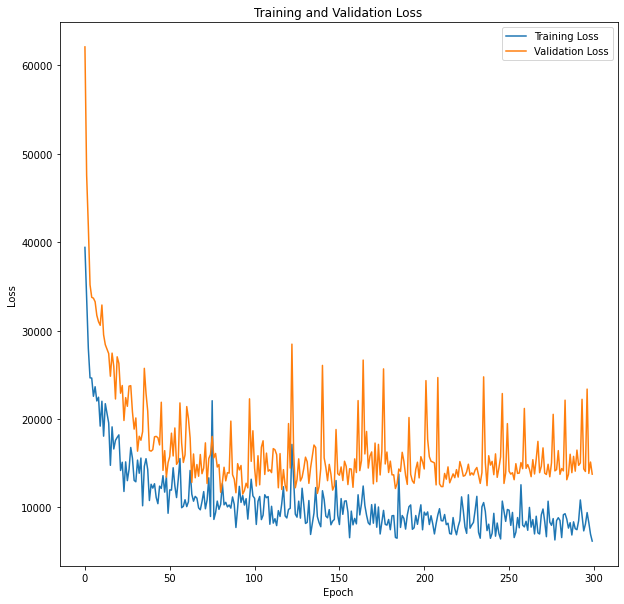

In [ ]:
# Membuat grafik nilai loss dari proses training dan validation
plt.figure(figsize = (10,10))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc = 'upper right')
plt.show()

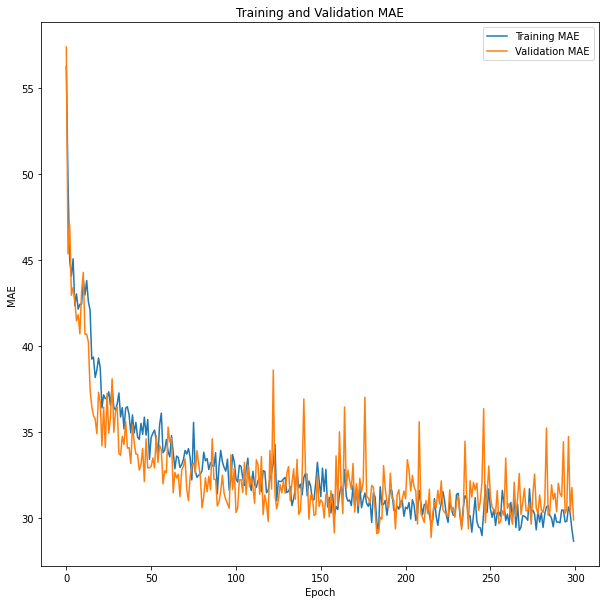

In [ ]:
# Membuat grafik nilai mean absolute error dari proses training dan validation
plt.figure(figsize = (10,10))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Accuracy Plot')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.title('Training and Validation MAE')
plt.legend(loc="upper right")
plt.show()

In [ ]:
# Evaluasi model pada test dataset
model.evaluate(X_test_preprocessed, y_test, verbose = 1)

63/63 [==============================] - 0s 1ms/step - loss: 13567.0596 - mae: 27.9768


[13567.0595703125, 27.976787567138672]

In [ ]:
# Melakukan prediksi menggunakan dataset X_test_preprocessed
y_pred = np.squeeze(model.predict(X_test_preprocessed))

In [ ]:
# Membuat fungsi untuk menghitung Regression metrics yang digunakan dalam mengevaluasi model
def regression_results(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred) 
    mse = mean_squared_error(y_true, y_pred) 
    mad = median_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
   
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAE: ', round(mae,4))
    print('Median Absolute Error: ', round(mad,4))
    print('R-squared: ', round(r2,4))
    print('\n')

In [ ]:
# Melakukan evaluasi model berdasarkan test set dengan metrics yang sudah ditentukan (mengecek performa akhir dari model)
regression_results(y_test, y_pred)

MSE:  13566.8157
RMSE:  116.4767
MAE:  27.9768
Median Absolute Error:  6.5518
R-squared:  0.8456




Performa akhir model menunjukkan nilai R-squared 0.8456 yang menandakan bahwa variasi nilai y (response variable/dependent variable) yang dapat dijelaskan oleh model hanya 84.56%.

Error Analysis

In [ ]:
# Tabel perbandingan nilai aktual dan prediksi beserta nilai error
df_results = pd.DataFrame({
    'Actual': y_test.tolist(),
    'Prediction': y_pred.tolist()
})

df_results['Error'] = df_results['Prediction'] - df_results['Actual']
df_results

,Actual,Prediction,Error
0,54.3966,42.907768,-11.488832
1,75.6548,41.432003,-34.222797
2,-2.0622,-12.556470,-10.494270
3,46.9764,55.768806,8.792406
4,-9.7050,-19.271318,-9.566318
...,...,...,...
1994,21.8376,41.320515,19.482915
1995,-5.6007,-12.417118,-6.816418
1996,-1.8904,-16.257105,-14.366705
1997,12.5990,35.668098,23.069098


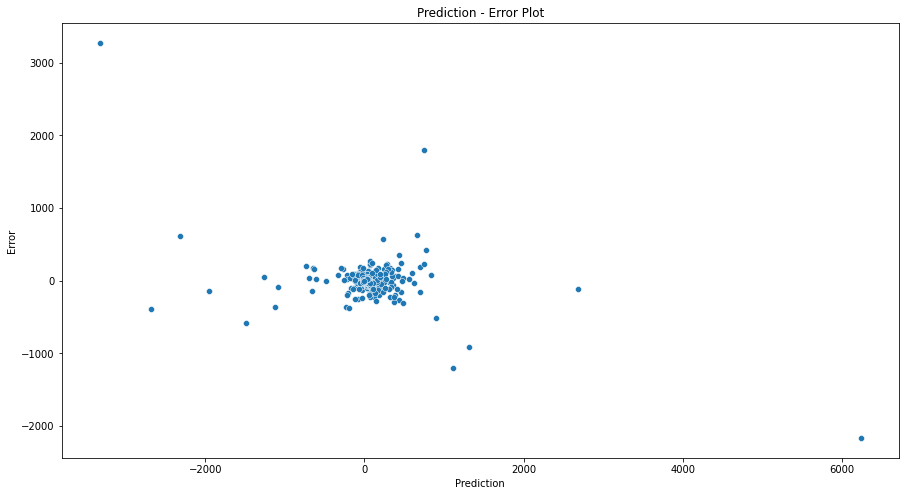

In [ ]:
# Membuat scatterplot nilai prediksi dengan nilai error(selisih nilai prediksi dengan nilai aktual)
plt.figure(figsize=(15,8))
sns.scatterplot(y_pred,df_results['Error'])
plt.xlabel('Prediction')
plt.ylabel('Error')
plt.title('Prediction - Error Plot')
plt.show()

Grafik di atas menunjukkan persebaran nilai prediksi dengan nilai error (selisih nilai prediksi dengan nilai aktual) pada test model. Grafik menunjukkan nilai error sudah berkisar di nilai nol yang menunjukkan hasil prediksi sudah cukup baik, namun ada beberapa amatan dimana data point yang hasil prediksinya meleset jauh (ditunjukkan oleh data point yang nilai error-nya jauh dari nol).

In [ ]:
# Menunjukkan statistik deskriptif dari variabel error
df_results[['Error']].describe()

,Error
count,1999.000000
mean,-0.310875
std,116.505404
min,-2166.138109
25%,-8.840421
50%,0.473758
75%,5.354902
max,3275.188205


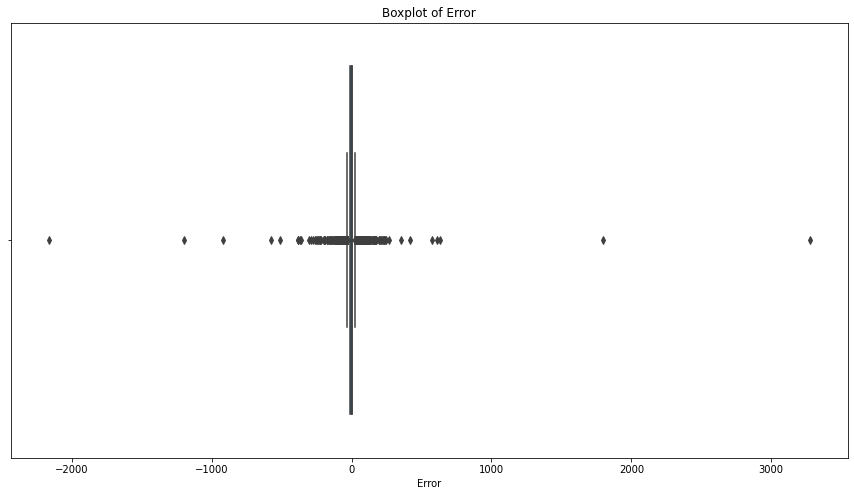

In [ ]:
# Menunjukkan boxplot nilai error untuk melihat adanya outlier
plt.figure(figsize=(15, 8))
sns.boxplot(df_results['Error'])
plt.title('Boxplot of Error')
plt.show()

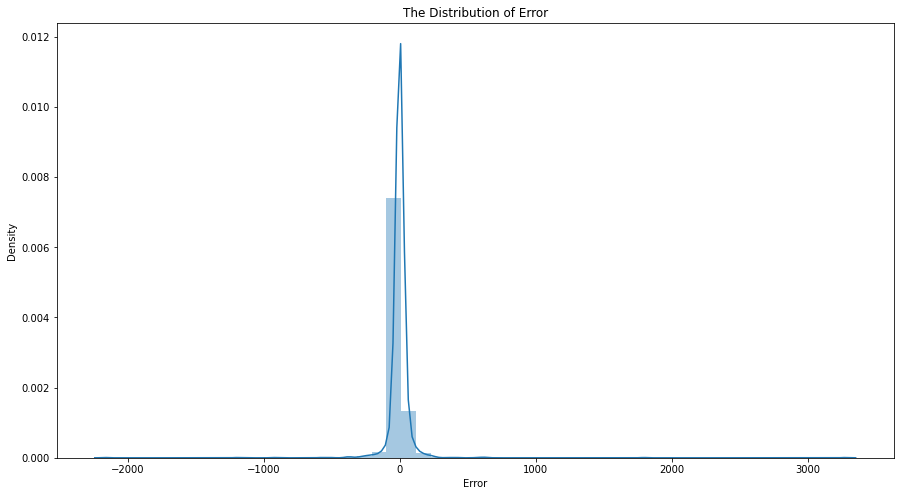

In [ ]:
# Membuat histogram untuk menunjukkan distribusi nilai error
plt.figure(figsize=(15, 8))
sns.distplot(df_results['Error'])
plt.title("The Distribution of Error")
plt.show()

Berdasarkan analisis beberapa grafik di atas, kita dapat melihat bahwa masih banyak *outlier* yang ada dalam nilai error sehingga kita menggunakan MAE (Mean Absolute Error) sebagai standar error dibandingkan dengan RMSE dan MSE karena MAE kurang sensitif terhadap *outlier* sementara RMSE dan MSE sangat sensitif terhadap *outlier*.

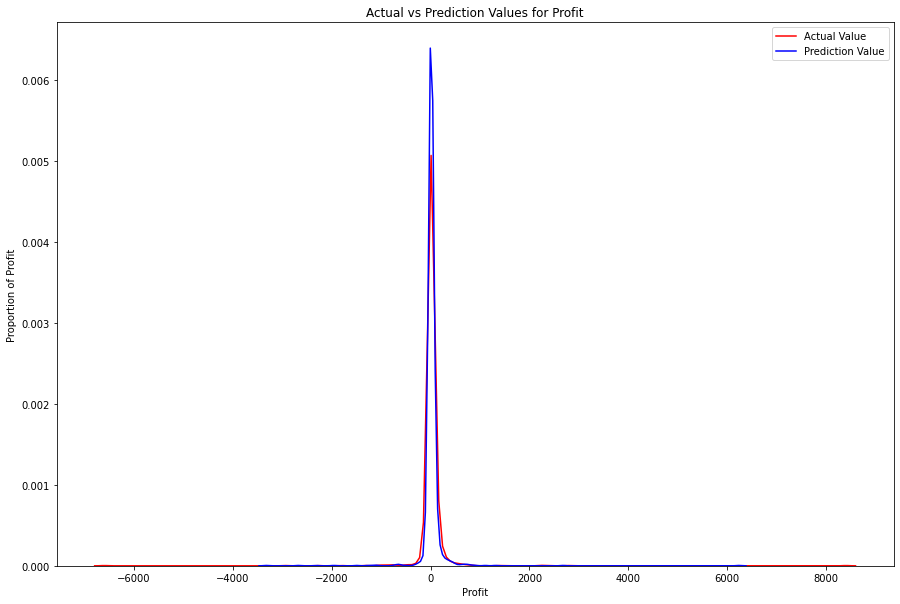

In [ ]:
# Distribution plot untuk melihat kemampuan model dalam menggeneralisasi data tes
plt.figure(figsize=(15, 10))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Prediction Value" , ax=ax1)

plt.title('Actual vs Prediction Values for Profit')
plt.xlabel('Profit')
plt.ylabel('Proportion of Profit')
plt.legend()
plt.show()
plt.close()

In [ ]:
# Menyimpan model
model.save('Linear_model.h5')

Model Analysis
- Model yang digunakan untuk memprediksi profit adalah ***Multiple Linear Regression with DNN*** memiliki nilai R-squared sebesar 0.8456 menandakan bahwa variasi nilai Y (Response Variable) yang dapat dijelaskan oleh model hanya 84.56%. Dapat disimpulkan bahwa melalui model ini kita dapat memprediksi profit berdasarkan *feature Ship Mode, Segment, Region, Category, Sales, Quantity dan Discount* dengan akurasi sebesar 84.56%.
-  MAE (Mean Absolute Error) digunakan sebagai standar *error* dibandingkan dengan RMSE dan MSE karena MAE kurang sensitif terhadap *outlier*. MAE yang dihasilkan oleh model ini adalah 27.98. Artinya dalam memprediksi profit, model memiliki nilai rata-rata *error* mutlak sebesar 27.98.

## Conclusion and Recommendation

- Dari tahun 2014-2017, terdapat tiga bulan dimana transaksi paling banyak terjadi yaitu bulan September, November dan Desember. Oleh karena itu, ketika memasuki bulan-bulan tersebut perlu dilakukan penyediaan barang yang cukup untuk memenuhi permintaan dari pelanggan dan meningkatkan kegiatan promosi untuk meningkatkan penjualan dan profit.

- Produk dengan kategori *Office Supplies* merupakan produk yang paling banyak dipesan dimana jumlah pesanannya mencapai 60.3% dari keseluruhan pesanan. Produk dengan kategori *Office Supplies* juga termasuk kategori yang menghasilkan profit margin yang tinggi yaitu 17%. Oleh karena itu, *Superstore* disarankan untuk terus menjamin ketersediaan barang dan meningkatkan penjualannya melalui strategi pemasaran yang tepat guna meningkatkan profit. 
- Produk dengan kategori *Technology* memiliki total pesanan yang paling sedikit (18.48%), tetapi mampu menghasilkan total penjualan, total profit dan *profit margin* tertinggi dibandingkan kategori lainnya. Selain itu, produk dengan kategori *Technology* menghasilkan total penjualan dan total profit tertinggi di semua segmen pelanggan. Oleh karena itu, produk dengan kategori *Technology* merupakan produk yang paling menguntungkan ketika dijual sehingga untuk kedepannya *Superstore* diharapkan dapat menjual lebih banyak lagi produk-produk dengan kategori *Technology*. 
- Produk dengan kategori *Furniture* memiliki total penjualan yang tinggi, kedua setelah *Technology*, tetapi besar profit margin yang dihasilkan hanya 2.5%. Hal ini disebabkan beberapa produk kategori *Furniture* yang dijual banyak menghasilkan kerugian dan produk tersebut memberikan diskon rata-rata cukup tinggi sehingga mengurangi profit. Oleh karena itu, *Superstore* disarankan untuk mengurangi penjualan produk-produk non-profit dan  mengurangi pemberian diskon sampai batasan nilai tertentu agar tidak mengalami kerugian.
- Sub-kategori *Copiers* memiliki profit tertinggi (di atas 50000 USD), diikuti *Phones*, *Accessories*, *Paper*, *Binders* dan *Chairs*. Oleh karena itu, diperlukan strategi pemasaran yang berfokus pada keenam sub-kategori tersebut agar dapat meningkatkan profit dari *Superstore*.
- Sub-kategori *Supplies*, *Bookcases* dan *Tables* memiliki profit margin negatif yang menandakan penjualan produk tersebut mengalami kerugian. Hal ini dikarenakan pemberian diskon yang cukup tinggi, di atas 20%. Ketiga sub-kategori tersebut akan tetap profit jika tidak diberikan diskon, namun apabila diskon yang diberikan ditambah akan mengalami kerugian atau menyebabkan profit margin negatif. Oleh karena itu, jika ingin menjual ketiga sub-kategori produk tersebut dan tetap mendapat profit maka tidak diberikan diskon, tetapi jika ingin diberikan diskon maka harus dalam batasan nilai tertentu agar tidak mengalami kerugian.
- Segmen pelanggan *Consumer* menjadi yang paling besar mencakup 51.94% total pelanggan. Selain itu, segmen *Consumer* menghasilkan total penjualan tertinggi dan mereka memesan barang dengan kuantitas terbanyak dibandingkan segmen lainnya. Namun, memliki profit margin terendah yaitu sebesar 11.5%. Hal ini dikarenakan segmen *Consumer* menghasilkan total penjualan yang tinggi, tetapi mendapat profit yang sangat rendah dari kategori produk *Furniture*. Oleh karena itu, perlu dikaji kembali dalam pemberian diskon pada produk kategori *Furniture* bagi segmen *Consumer* sehingga diharapkan dapat meningkatkan profit.
- Segmen *Home Office* menghasilkan total penjualan terendah dan jumlah barang yang dipesan juga terendah dibandingkan segmen lainnya, tetapi memiliki profit margin tertinggi yaitu sebesar 14%. Hal ini menunjukkan segmen *Home Office* memiliki potensi yang lebih baik dalam menghasilkan profit dibandingkan segmen lainnya. Namun, segmen Home Office memiliki jumlah pelanggan yang terendah hanya sebesar 17.84%. Oleh karena itu, perlu dibuat strategi pemasaran dan penjualan guna meningkatkan pelanggan dari segmen *Home Office*.
- *California* dan *New York* menjadi negara bagian yang menghasilkan total penjualan terbesar di *United States* dan 51.2% total profit secara keseluruhan berasal dari kedua negara bagian tersebut. *California* dan *New York* juga memberikan diskon rata-rata di bawah 10%, ini menjadi salah satu alasan utama yang menyebabkan total pendapatan dan total profit menjadi yang tertinggi. Hal ini menunjukkan bahwa strategi promosi dengan menawarkan sedikit diskon sangat efektif di negara bagian *California* dan *New York*.
- *Texas*, *Ohio*, *Pennsylvania* dan *Illinois* menjadi negara bagian yang menghasilkan kerugian terbesar di mana 72.1% total kerugian berasal dari keempat negara bagian tersebut. *Texas* menjadi negara bagian yang paling banyak menghasilkan kerugian, lebih dari 25% total kerugian berasal dari *Texas*. Hal ini disebabkan keempat negara bagian tersebut memberikan diskon rata-rata yang tinggi yaitu di atas 30%. Oleh karena itu, *Superstore* disarankan untuk mengurangi pemberian diskon di keempat negara bagian tersebut dan lebih baik beralih strategi promosi lainnya untuk meminimalkan kerugian.
- Model yang digunakan untuk memprediksi profit adalah Multiple Linear Regression with DNN memiliki nilai R-squared sebesar 0.8456 menandakan bahwa variasi nilai Y (Response Variable) yang dapat dijelaskan oleh model hanya 84.56%. Sementara MAE yang dihasilkan oleh model ini adalah 27.98. Artinya dalam memprediksi profit, model memiliki nilai rata-rata error mutlak sebesar 27.98.